# Growth Limiation - Create a grid of factor most limiting growth at each year for summer months, for each phytoplankton group... throuhout the whole Arctic Ocean. 
1. find what areas around the Arctic are limited by what, and 
2. see how you can plot difference plots or show how these differ between high and low temp, ice and NO$_3$ years. 

In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
#import hvplot.xarray
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy

In [2]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

In [3]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [4]:
path = '/glade/campaign/cesm/development/bgcwg/projects/marbl-spectra/GNG595_2ndcycle_1990-2009_clim'
files = sorted(glob.glob(f'{path}/*.nc', recursive=True),key=numericalSort)
ds= xr.open_mfdataset(files,combine='by_coords')

## Check what these files are, because they could save a lot of time... 

In [5]:
diat3_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_index_remap.nc', decode_times=False)
pp_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/pp_lim_index_remap.nc',decode_times=False)
diat2_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat2_lim_index_remap.nc',decode_times=False)
diat1_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat1_lim_index_remap.nc',decode_times=False)
mp1_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp1_lim_index_remap.nc',decode_times=False)
mp2_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp2_lim_index_remap.nc',decode_times=False)
mp3_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp3_lim_index_remap.nc',decode_times=False)
mp4_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp4_lim_index_remap.nc',decode_times=False)

	NC4_open: path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_index_remap.nc mode 4096 params 0
	HDF5 error messages turned on.
			nc4_open_file: path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_index_remap.nc mode 4096
			nc4_grp_list_add: name / 
			nc4_rec_read_metadata: grp->hdr.name /
			found dataset time
			found dataset lon
			found dataset lat
			found dataset month
			found dataset diat3_lim_index
ERROR: Invalid _NCProperties attribute
		*** NetCDF-4 Internal Metadata: int_ncid 0xd0000 ext_ncid 0xd0000
		FILE - path: /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_index_remap.nc cmode: 0x1008 parallel: 0 redef: 0 fill_mode: 0 no_write: 1 next_nc_grpid: 1
		 GROUP - / nc_grpid: 0 nvars: 5 natts: 0
		 DIMENSION - dimid: 0 name: time len: 63 unlimited: 1
		 DIMENSION - dimid: 1 name: lon len: 360 unlimited: 0
		 DIMENSION - dimid: 2 name: lat len: 180 unlimited: 0
		 DIMENSION - dimid: 3 name: month len: 12 unlimited: 0
		 VARIABLE - varid: 0 nam

In [6]:
diat3_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_value_remap.nc', decode_times=False)
pp_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/pp_lim_value_remap.nc',decode_times=False)
diat2_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat2_lim_value_remap.nc',decode_times=False)
diat1_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat1_lim_value_remap.nc',decode_times=False)
mp1_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp1_lim_value_remap.nc',decode_times=False)
mp2_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp2_lim_value_remap.nc',decode_times=False)
mp3_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp3_lim_value_remap.nc',decode_times=False)
mp4_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp4_lim_value_remap.nc',decode_times=False)

	NC4_open: path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_value_remap.nc mode 4096 params 0
	HDF5 error messages turned on.
			nc4_open_file: path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_value_remap.nc mode 4096
			nc4_grp_list_add: name / 
			nc4_rec_read_metadata: grp->hdr.name /
			found dataset time
			found dataset lon
			found dataset lat
			found dataset month
			found dataset diat3_lim_value
ERROR: Invalid _NCProperties attribute
		*** NetCDF-4 Internal Metadata: int_ncid 0x150000 ext_ncid 0x150000
		FILE - path: /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_value_remap.nc cmode: 0x1008 parallel: 0 redef: 0 fill_mode: 0 no_write: 1 next_nc_grpid: 1
		 GROUP - / nc_grpid: 0 nvars: 5 natts: 0
		 DIMENSION - dimid: 0 name: time len: 63 unlimited: 1
		 DIMENSION - dimid: 1 name: lon len: 360 unlimited: 0
		 DIMENSION - dimid: 2 name: lat len: 180 unlimited: 0
		 DIMENSION - dimid: 3 name: month len: 12 unlimited: 0
		 VARIABLE - varid: 0 n

In [7]:
diat3_val.diat3_lim_value

O attnum -1 mem_type 2
		NC4_inq_unlimdims: ncid 0x1c0000
		NC4_inq_unlimdims: ncid 0x1c0000
		NC4_inq_unlimdims: ncid 0x1c0000
		NC4_inq_unlimdims: ncid 0x1c0000
		NC4_inq_unlimdims: ncid 0x1c0000
		NC4_inq_unlimdims: ncid 0x1c0000
		NC4_inq_unlimdims: ncid 0x1c0000
		NC4_inq_unlimdims: ncid 0x1c0000
		NC4_inq_var_all: ncid 0x1c0000 varid 0
		NC4_inq_var_all: ncid 0x1c0000 varid 0
		NC4_inq_dim: ncid 0x1c0000 dimid 0
		NC4_inq_dim: ncid 0x1c0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_var_all: ncid 0x1c0000 varid 0
		NC4_inq_var_all: ncid 0x1c0000 varid 0
		NC4_inq_dim: ncid 0x1c0000 dimid 0
		NC4_inq_var_all: ncid 0x1c0000 varid 0
		NC4_inq_var_all: ncid 0x1c0000 varid 0
		NC4_inq_dim: ncid 0x1c0000 dimid 0
		NC4_inq_var_all: ncid 0x1c0000 varid 0
			NC4_get_vars: var->hdr.name time mem_nc_type 6
		NC4_inq_dim: ncid 0x1c0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_var_all: ncid 0x1c0000 varid 0
		NC4_inq_var_all: ncid 0x1c0000 varid 0
		NC4_inq_d

<xarray.DataArray 'diat3_lim_value' (time: 63, month: 12, lat: 180, lon: 360)>
dask.array<open_dataset-4b72a8f85a3d34b2b479c4bbdc50fbafdiat3_lim_value, shape=(63, 12, 180, 360), dtype=float64, chunksize=(63, 12, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) float64 2.266e+04 2.269e+04 2.272e+04 ... 2.296e+04 2.3e+04
Attributes:
    long_name:  diatom 3 maximum limitation value, carbon biomass weighted av...

## Set up colorbar

In [8]:
# colors for each variable 
# temperature (Blue)
temperature3 = ''
temperature2        = '#e0f3f8'
temperature1       = '#abd9e9'
temperature       = '#74add1'
# light (yellow)
light   = '#fdae61'
light1   ='#fee090'
light2   ='#ffffbf'
light3=''
# nutrients (Green)
nitrate2     = '#AFE1AF'
nitrate1     ='#00A36C'
nitrate     ='#097969'

from matplotlib.colors import LinearSegmentedColormap
color_temp = [temperature,temperature1,temperature2]
color_light = [light,light1,light2]
color_nutrients = [nitrate,nitrate1,nitrate2]

cmap_name = 'my_list'
cm_temp = LinearSegmentedColormap.from_list(
        cmap_name, color_temp, N=3)
cm_light = LinearSegmentedColormap.from_list(
        cmap_name, color_light, N=3)
cm_nutrients = LinearSegmentedColormap.from_list(
        cmap_name, color_nutrients, N=3)

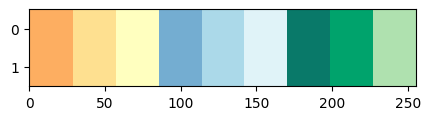

In [17]:
N = 3 # number of colors to extract from each of the base_cmaps below
phyto = [cm_light,cm_temp,cm_nutrients]

n_base = len(phyto)
# we go from 0.2 to 0.8 below to avoid having several whites and blacks in the resulting cmaps
colors_phyto = np.concatenate([plt.get_cmap(name)(np.linspace(0,1,N)) for name in phyto])
cm_phyto = mpl.colors.ListedColormap(colors_phyto)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(1,1,figsize=(5,1))
ax.imshow(gradient, aspect='auto', cmap=cm_phyto)

## Plot the regional limitaiton during the summer to make sure these are working correctly! 

		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_dim: ncid 0x160000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
			NC4_get_vars: var->hdr.name pp_lim_value mem_nc_type 6
		NC4_inq_dim: ncid 0x

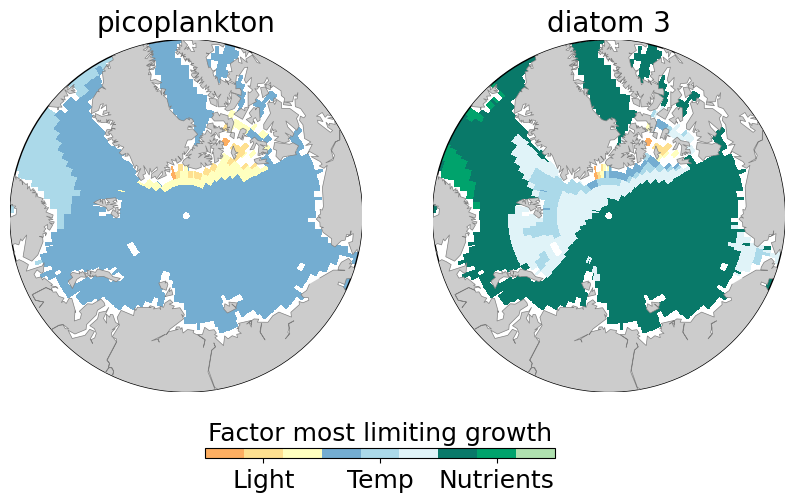

CPU times: user 2.99 s, sys: 2.29 s, total: 5.29 s
Wall time: 6.29 s


<Figure size 640x480 with 0 Axes>

In [18]:
%%time
from cartopy.util import add_cyclic_point
fig = plt.figure(figsize=(10,5))
# ------------------------- Picoplankton ---------------------------
# Summer
ax = fig.add_subplot(121) 
ax.set_title("picoplankton",fontsize=20)
pp_lims = (pp_val.pp_lim_value.where(pp_val.pp_lim_value < 0.9) + pp_ind.pp_lim_index.where(pp_val.pp_lim_value < 0.9))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
summer, lon = add_cyclic_point(np.nanmean(pp_lims[:,5:8,:,:], axis=(0,1)), coord=diat3_val.lon, axis=1)
x, y = m(*np.meshgrid(lon,diat3_val.lat))
cf = m.pcolormesh(x,y,summer,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Summer
ax = fig.add_subplot(122) 
ax.set_title("diatom 3",fontsize=20)
diat3_lims = (diat3_val.diat3_lim_value.where(diat3_val.diat3_lim_value < 0.9) + diat3_ind.diat3_lim_index.where(diat3_val.diat3_lim_value < 0.9))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
summer, lon = add_cyclic_point(np.nanmean(diat3_lims[:,5:8,:,:], axis=(0,1)), coord=diat3_val.lon, axis=1)
x, y = m(*np.meshgrid(lon,diat3_val.lat))
cff = m.pcolormesh(x,y,summer,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

cbar_ax = fig.add_axes([0.32, 0.01, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Light','Temp', 'Nutrients'], fontsize = 18)
cbar.ax.set_title('Factor most limiting growth', fontsize = 18)
m.plot
plt.show()
plt.tight_layout()

### This confirms that it does show the same trends as it does the none 1 degree grid

In [20]:
%%time
pp_lims = (pp_val.pp_lim_value.where(pp_val.pp_lim_value < 0.9) + pp_ind.pp_lim_index.where(pp_val.pp_lim_value < 0.9))
mp1_lims = (mp1_val.mp1_lim_value.where(mp1_val.mp1_lim_value < 0.9) + mp1_ind.mp1_lim_index.where(mp1_val.mp1_lim_value < 0.9))
mp2_lims = (mp2_val.mp2_lim_value.where(mp2_val.mp2_lim_value < 0.9) + mp2_ind.mp2_lim_index.where(mp2_val.mp2_lim_value < 0.9))
mp3_lims = (mp3_val.mp3_lim_value.where(mp3_val.mp3_lim_value < 0.9) + mp3_ind.mp3_lim_index.where(mp3_val.mp3_lim_value < 0.9))
mp4_lims = (mp4_val.mp4_lim_value.where(mp4_val.mp4_lim_value < 0.9) + mp4_ind.mp4_lim_index.where(mp4_val.mp4_lim_value < 0.9))
diat1_lims = (diat1_val.diat1_lim_value.where(diat1_val.diat1_lim_value < 0.9) + diat1_ind.diat1_lim_index.where(diat1_val.diat1_lim_value < 0.9))
diat2_lims = (diat2_val.diat2_lim_value.where(diat2_val.diat2_lim_value < 0.9) + diat2_ind.diat2_lim_index.where(diat2_val.diat2_lim_value < 0.9))
diat3_lims = (diat3_val.diat3_lim_value.where(diat3_val.diat3_lim_value < 0.9) + diat3_ind.diat3_lim_index.where(diat3_val.diat3_lim_value < 0.9))

CPU times: user 59.5 ms, sys: 38 µs, total: 59.6 ms
Wall time: 64.8 ms


In [22]:
%%time
phyto_lims_summer = np.stack([np.nanmean(pp_lims[:,5:8,:,:],axis=1),
                       np.nanmean(mp1_lims[:,5:8,:,:],axis=1),
                       np.nanmean(diat1_lims[:,5:8,:,:],axis=1),
                       np.nanmean(mp2_lims[:,5:8,:,:],axis=1),
                       np.nanmean(diat2_lims[:,5:8,:,:],axis=1),
                       np.nanmean(mp3_lims[:,5:8,:,:],axis=1),
                       np.nanmean(diat3_lims[:,5:8,:,:],axis=1),
                       np.nanmean(mp4_lims[:,5:8,:,:],axis=1)
                      ],axis=0)

		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_dim: ncid 0x160000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
			NC4_get_vars: var->hdr.name pp_lim_value mem_nc_type 6
		NC4_inq_dim: ncid 0x

CPU times: user 4.27 s, sys: 8.75 s, total: 13 s
Wall time: 16.6 s


In [23]:
%%time
phyto_lims_fall = np.stack([np.nanmean(pp_lims[:,8:11,:,:],axis=1),
                       np.nanmean(mp1_lims[:,8:11,:,:],axis=1),
                       np.nanmean(diat1_lims[:,8:11,:,:],axis=1),
                       np.nanmean(mp2_lims[:,8:11,:,:],axis=1),
                       np.nanmean(diat2_lims[:,8:11,:,:],axis=1),
                       np.nanmean(mp3_lims[:,8:11,:,:],axis=1),
                       np.nanmean(diat3_lims[:,8:11,:,:],axis=1),
                       np.nanmean(mp4_lims[:,8:11,:,:],axis=1)
                      ],axis=0)

		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_dim: ncid 0x160000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
			NC4_get_vars: var->hdr.name pp_lim_value mem_nc_type 6
		NC4_inq_dim: ncid 0x

CPU times: user 4.26 s, sys: 8.82 s, total: 13.1 s
Wall time: 15.9 s


In [24]:
%%time
phyto_lims_spring = np.stack([np.nanmean(pp_lims[:,2:5,:,:],axis=1),
                       np.nanmean(mp1_lims[:,2:5,:,:],axis=1),
                       np.nanmean(diat1_lims[:,2:5,:,:],axis=1),
                       np.nanmean(mp2_lims[:,2:5,:,:],axis=1),
                       np.nanmean(diat2_lims[:,2:5,:,:],axis=1),
                       np.nanmean(mp3_lims[:,2:5,:,:],axis=1),
                       np.nanmean(diat3_lims[:,2:5,:,:],axis=1),
                       np.nanmean(mp4_lims[:,2:5,:,:],axis=1)
                      ],axis=0)

		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_dim: ncid 0x160000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
			NC4_get_vars: var->hdr.name pp_lim_value mem_nc_type 6
		NC4_inq_dim: ncid 0x

CPU times: user 4.27 s, sys: 8.55 s, total: 12.8 s
Wall time: 15.5 s


In [25]:
%%time
phyto_lims_winter = np.stack([np.nanmean(pp_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(mp1_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(diat1_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(mp2_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(diat2_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(mp3_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(diat3_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(mp4_lims[:,list(range(2)) + [-1],:,:],axis=1)
                      ],axis=0)

		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_dim: ncid 0x160000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
			NC4_get_vars: var->hdr.name pp_lim_value mem_nc_type 6
		NC4_inq_dim: ncid 0x

CPU times: user 4.47 s, sys: 8.83 s, total: 13.3 s
Wall time: 16 s


## Create colormap with three different colors, representing temperature, light and nutrients. 

In [26]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0.9994925028835063, 0.9192618223760093, 0.6061361014994233),(0.45066769191336664, 0.7509983339741125, 0.7703857490708702),(0.6825187635707243, 0.810691907283208, 0.6352470180118206)]

cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=3)

## Create grid, with phytoplankton types in the y axis, and years in the x axis, that are color coded with the most limiting factor. 

In [28]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [29]:
years = ['1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959',
         "1960",'1961','1962','1963','1964','1965','1966','1967','1968','1969',
         "1970",'1971','1972','1973','1974','1975','1976','1977','1978','1979',
         "1980",'1981','1982','1983','1984','1985','1986','1987','1988','1989',
         "1990",'1991','1992','1993','1994','1995','1996','1997','1998','1999',
         '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009']

## this is the actual values of the differnt regions that I want 
Arctic Regions

| Initials  | Name                       | Latitude          | Longitude             |
|-----------|----------------------------|-------------------|-----------------------|
| `ao`      | Central Arctic             | $90^oN$ to $80^oN$ |  All                 |
| `cs`      | Chukchi Sea                | $80^oN$ to $60^oN$ |$-180^o$ to $-155^oW$ |
| `bs`      | Beaufort Sea               | $80^oN$ to $60^oN$ |$-155^oW$ to $-125^oW$|
| `ca`      | Canadian Archipelago       | $80^oN$ to $60^oN$ |$-125^oW$ to $-100^oW$ |
| `bb`      | Baffin Sea                 | $80^oN$ to $60^oN$ |$-100^oW$ to $-45^oW$  |                      
| `ess`     | Eastern Siberian Sea       | $80^oN$ to $60^oN$ |$145^oE$ to $180^o$   |                       
| `ls`      | Laptev Sea                 | $80^oN$ to $60^oN$ |$90^oE$ to $145^oE$   |                      
| `ks`      | Kara Sea                   | $80^oN$ to $60^oN$ |$53^oE$ to $90^oE$    |                      
| `bts`     | Barents Sea                | $80^oN$ to $60^oN$ |$20^oE$ to $53^oE$    |                      
| `ns`      | Nordic Sea                 | $80^oN$ to $60^oN$ |$-45^oW$ to $20^oE$   | 


|Region| Latitude | Longitude | Matrix Inputs       |
|------|----------|-----------|---------------------|
|`ao`  |170:180   |:          |`[:,170:180,:]`      |
|`cs`  |149:170   |0:25       |`[:,149:170,0:25]`   |
|`bs`  |149:170   | 25:55     |`[:,149:170,25:55]`  |
|`ca`  |149:170   |55:80     |`[:,149:170,55:110]` |
|`bb`  |149:170   |80:135    |`[:,149:170,110:135]`|
|`ess` |149:170   |325:360    |`[:149:170,325:360]` |
|`ls`  |149:170   |270:325    |`[:,149:170,270:325]`|
|`ks`  |149:170   |233:270    |`[:,149:170,233:270]`|
|`bts` |149:170   |200:233    |`[:,149:170,205:233]`|
|`ns`  |149:170   |155:200    |`[:,149:170,155:205]`|

## Central Arctic Ocean 

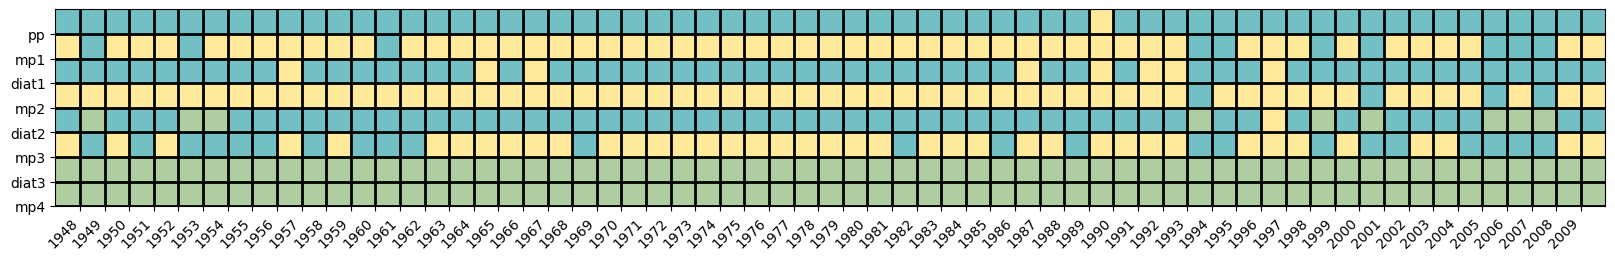

In [42]:
region = 'ao'
season = 'summer'
data =  np.nanmean(phyto_lims_summer[:,:,170:180,:],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
region = 'ao'
season = 'summer'
fig.savefig(f'{file}central_{region}_{season}.png', dpi=600, bbox_inches='tight')

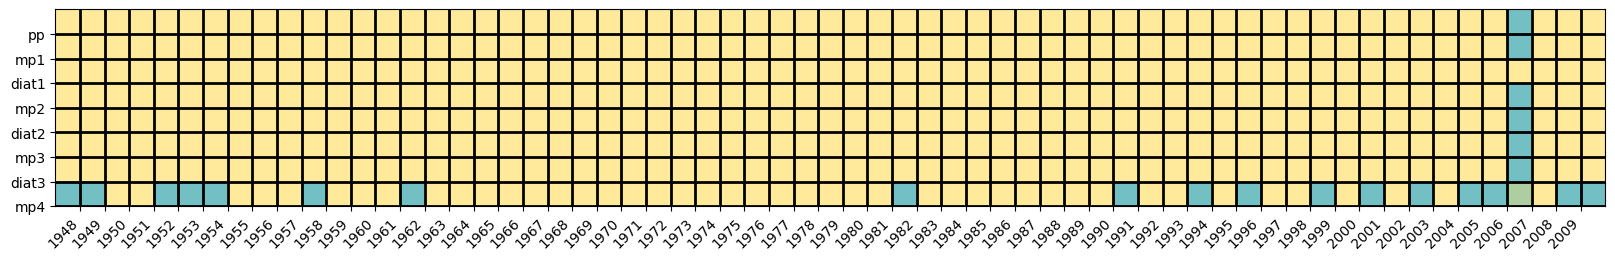

In [43]:
region = 'ao'
season = 'spring'
data =  np.nanmean(phyto_lims_spring[:,:,170:180,:],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}.png', dpi=600, bbox_inches='tight')

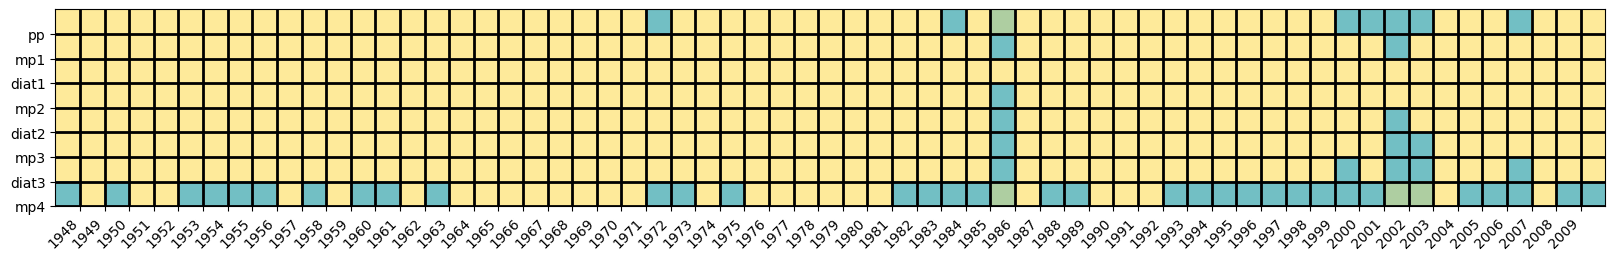

In [44]:
region = 'ao'
season = 'winter'
data =  np.nanmean(phyto_lims_winter[:,:,170:180,:],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}.png', dpi=600, bbox_inches='tight')

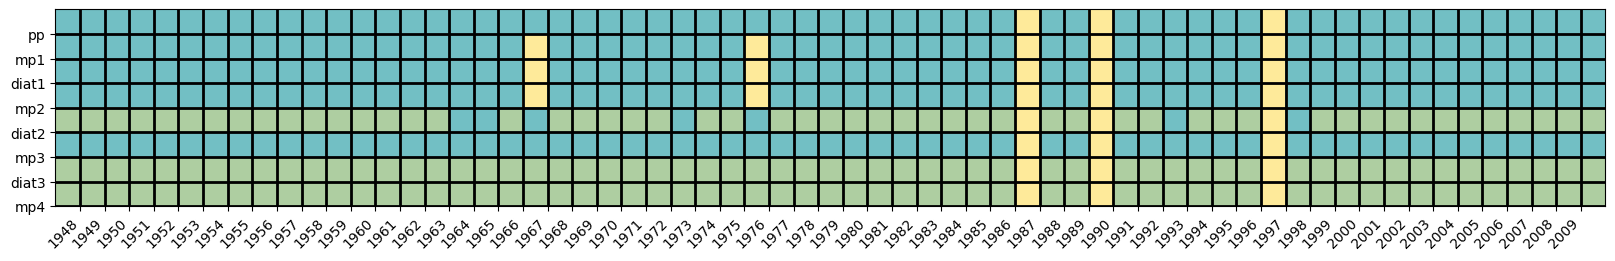

In [45]:
region = 'ao'
season = 'fall'
data =  np.nanmean(phyto_lims_fall[:,:,170:180,:],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}.png', dpi=600, bbox_inches='tight')

# Chukchi Sea

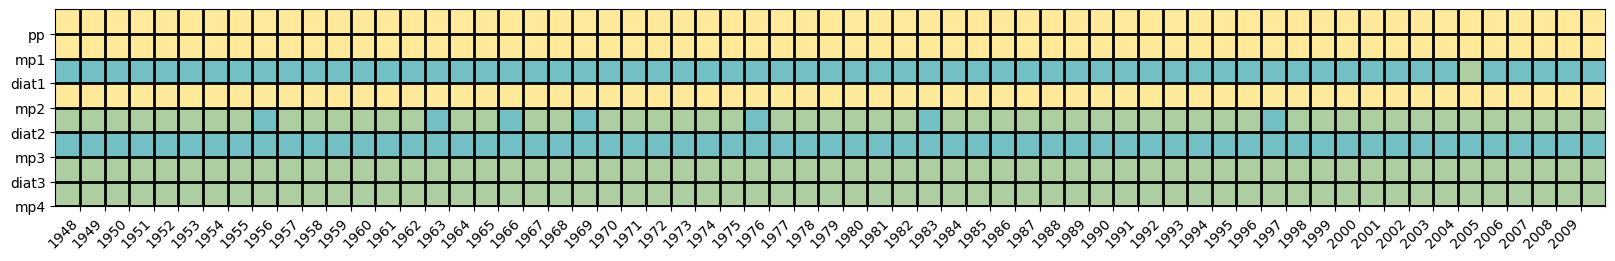

In [46]:
region = 'cs'
season = 'summer'
data =  np.nanmean(phyto_lims_summer[:,:,149:170,0:25],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

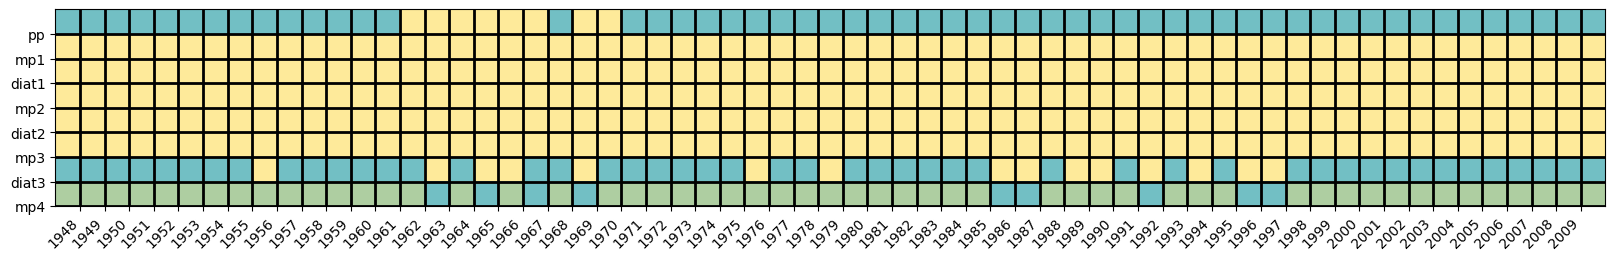

In [47]:
region = 'cs'
season = 'spring'
data =  np.nanmean(phyto_lims_spring[:,:,149:170,0:25],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

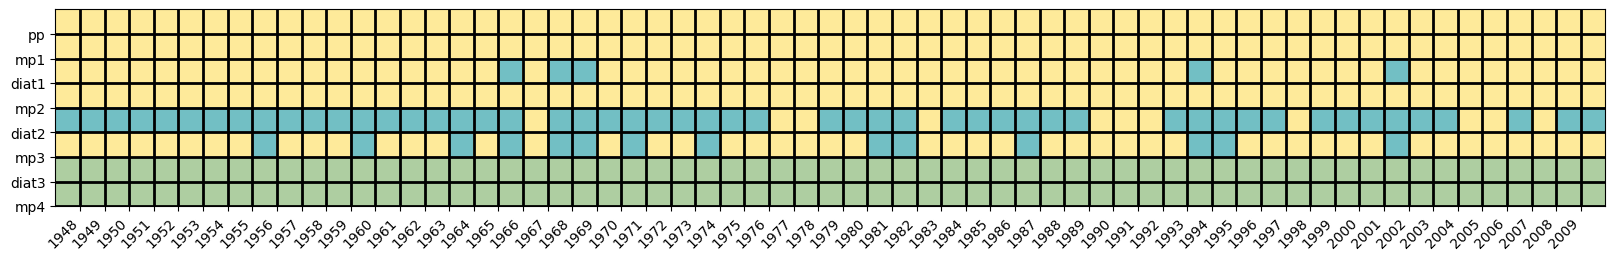

In [48]:
region = 'cs'
season = 'fall'
data =  np.nanmean(phyto_lims_fall[:,:,149:170,0:25],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

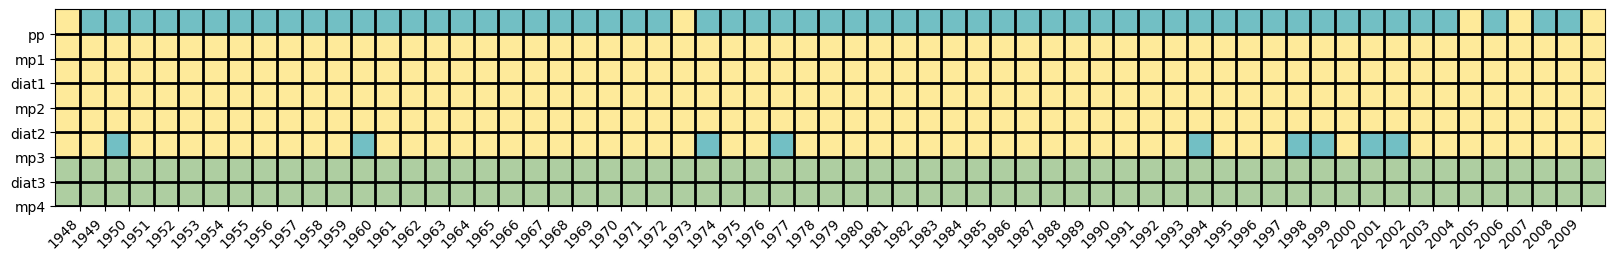

In [49]:
region = 'cs'
season = 'winter'
data =  np.nanmean(phyto_lims_winter[:,:,149:170,0:25],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

# Beaufort Sea

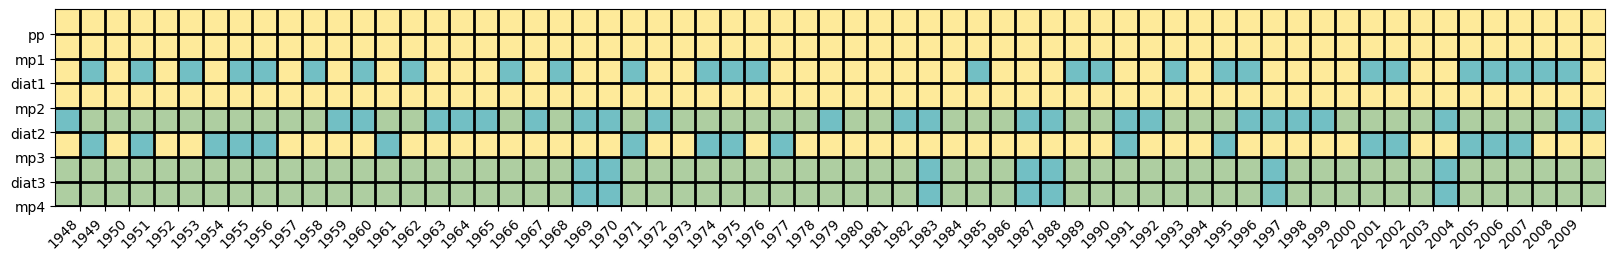

In [81]:
region = 'bs'
season = 'summer'
data =  np.nanmean(phyto_lims_summer[:,:,149:170,25:55],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

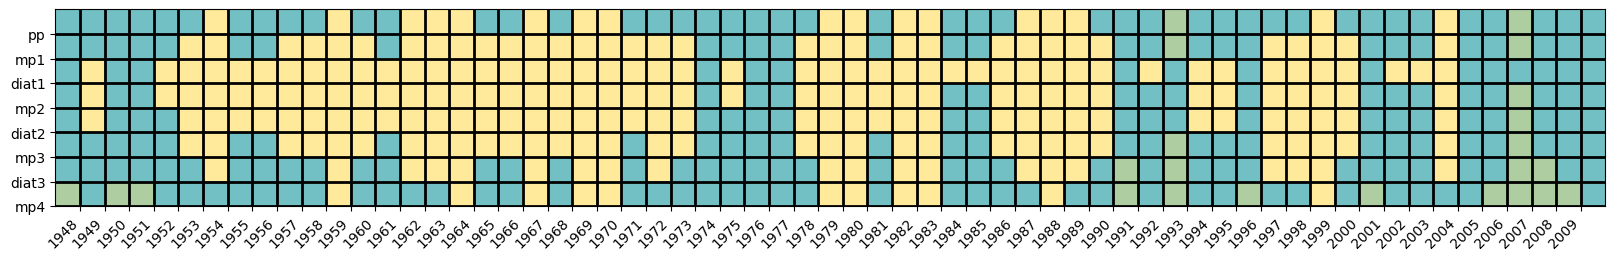

In [50]:
region = 'bs'
season = 'spring'
data =  np.nanmean(phyto_lims_spring[:,:,149:170,25:55],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

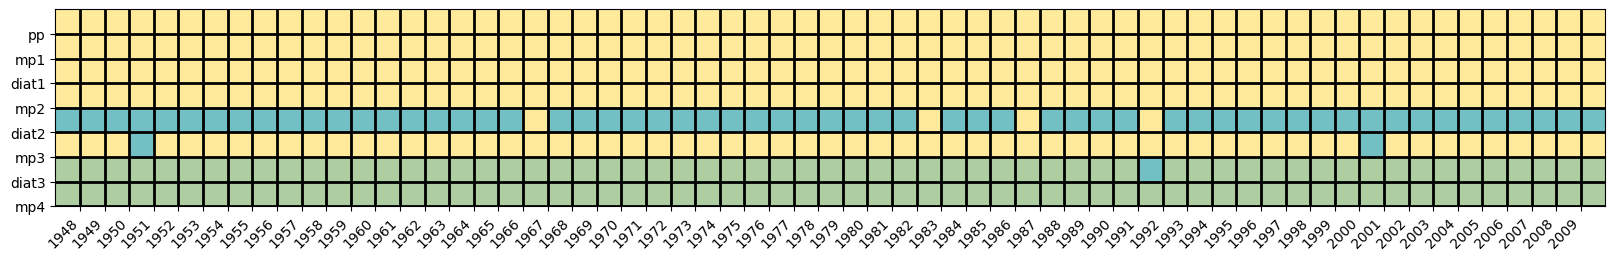

In [51]:
region = 'bs'
season = 'fall'
data =  np.nanmean(phyto_lims_fall[:,:,149:170,25:55],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

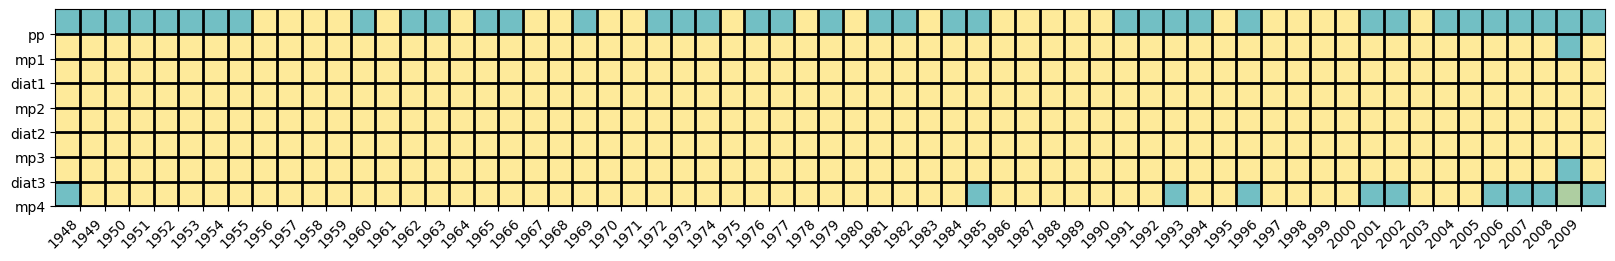

In [52]:
region = 'bs'
season = 'winter'
data =  np.nanmean(phyto_lims_winter[:,:,149:170,25:55],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

# Canadian Archipelago

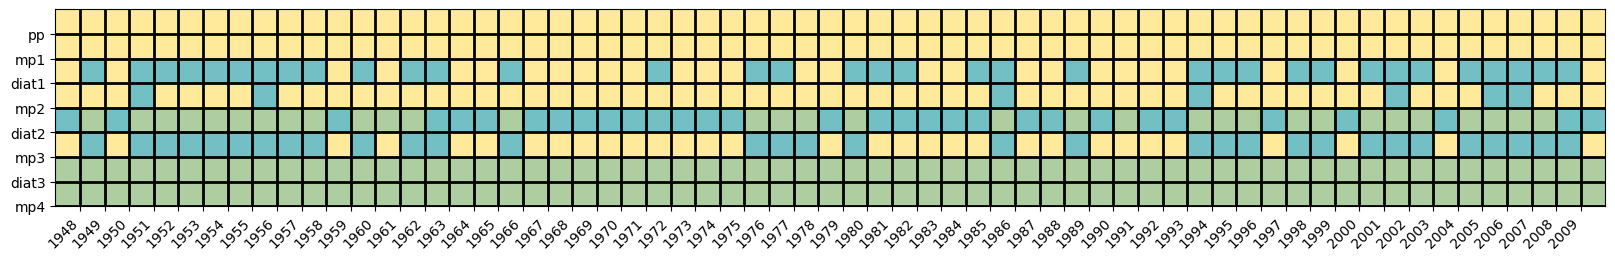

In [53]:
region = 'ca'
season = 'summer'
data =  np.nanmean(phyto_lims_summer[:,:,149:170,55:110],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

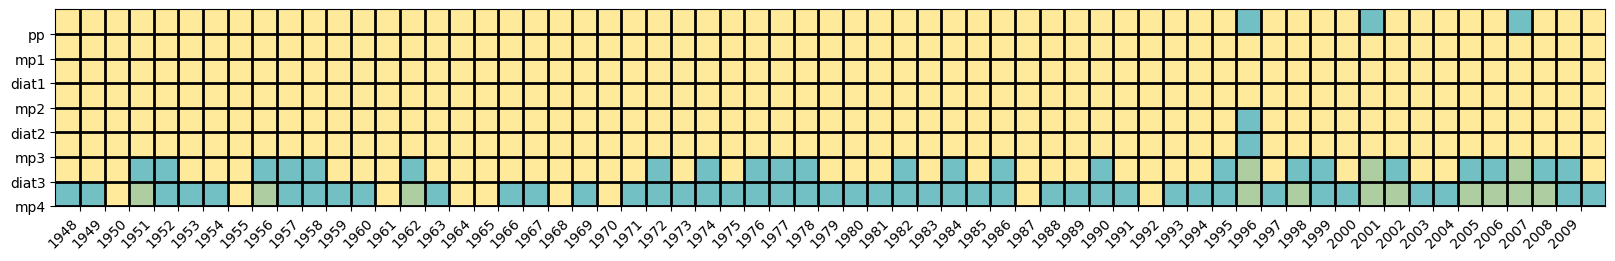

In [54]:
region = 'ca'
season = 'spring'
data =  np.nanmean(phyto_lims_spring[:,:,149:170,55:110],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

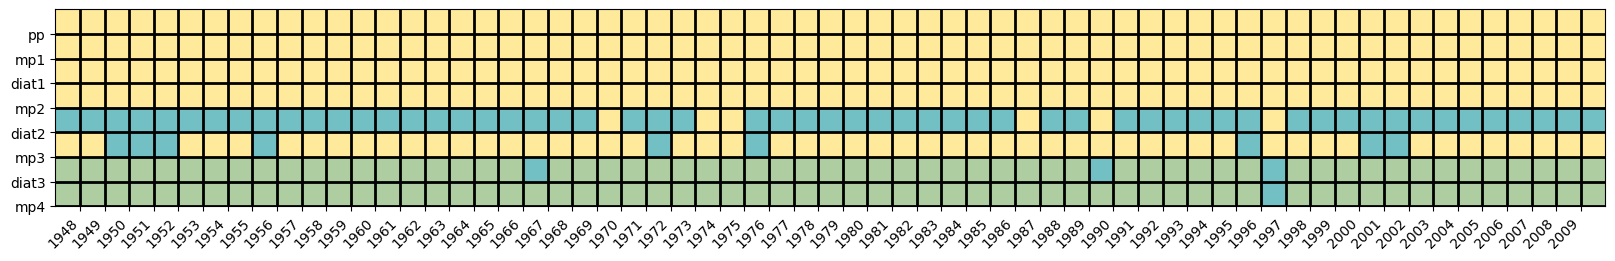

In [55]:
region = 'ca'
season = 'fall'
data =  np.nanmean(phyto_lims_fall[:,:,149:170,55:110],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

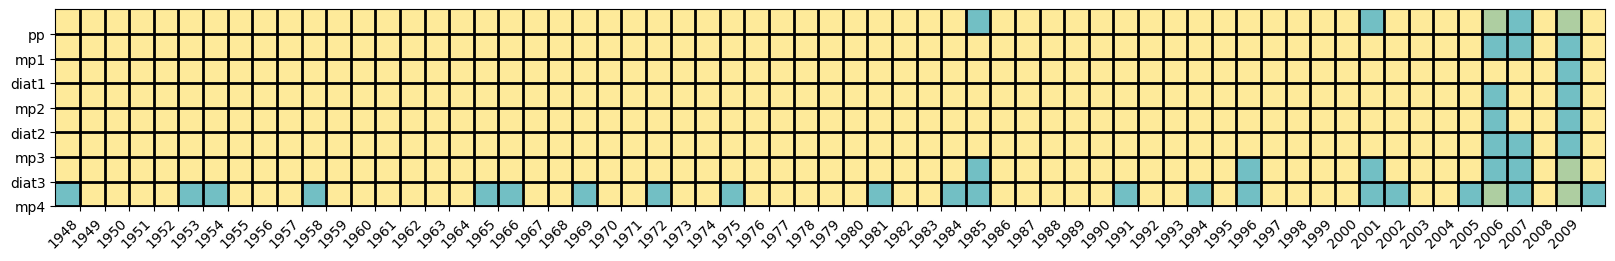

In [56]:
region = 'ca'
season = 'winter'
data =  np.nanmean(phyto_lims_winter[:,:,149:170,55:110],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

# Baffin Sea

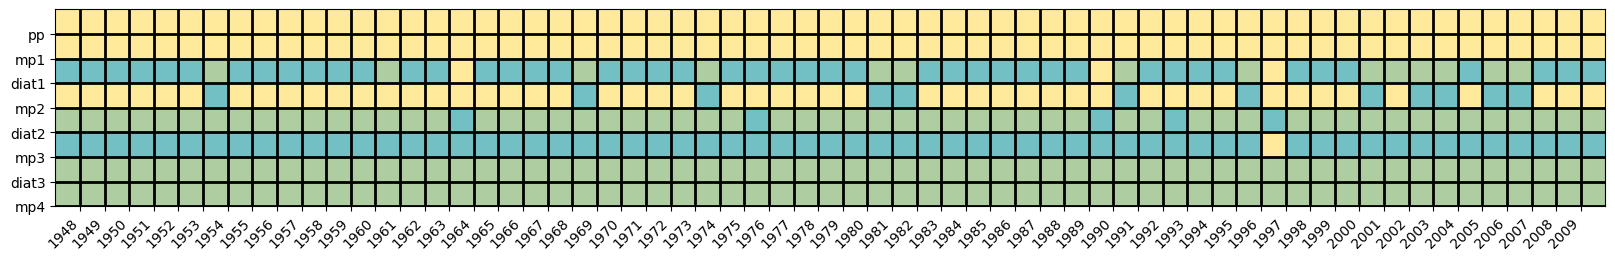

In [57]:
region = 'bb'
season = 'summer'
data =  np.nanmean(phyto_lims_summer[:,:,149:170,110:135],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

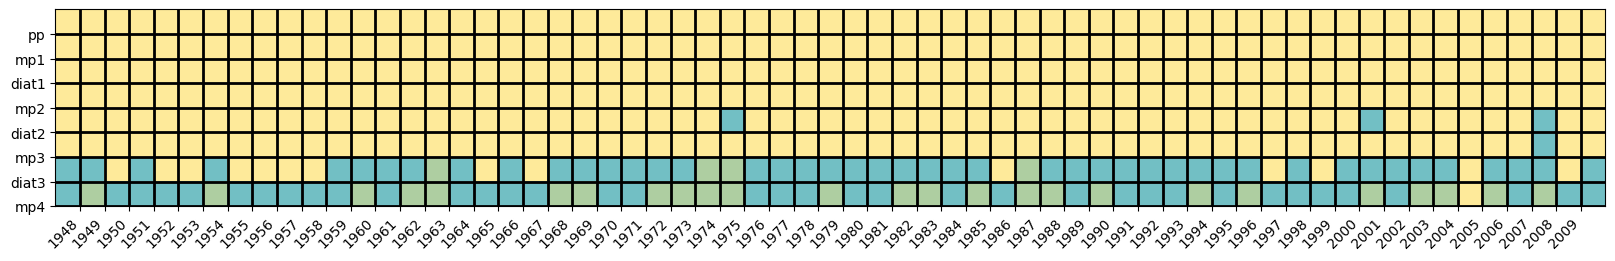

In [58]:
region = 'bb'
season = 'spring'
data =  np.nanmean(phyto_lims_spring[:,:,149:170,110:135],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

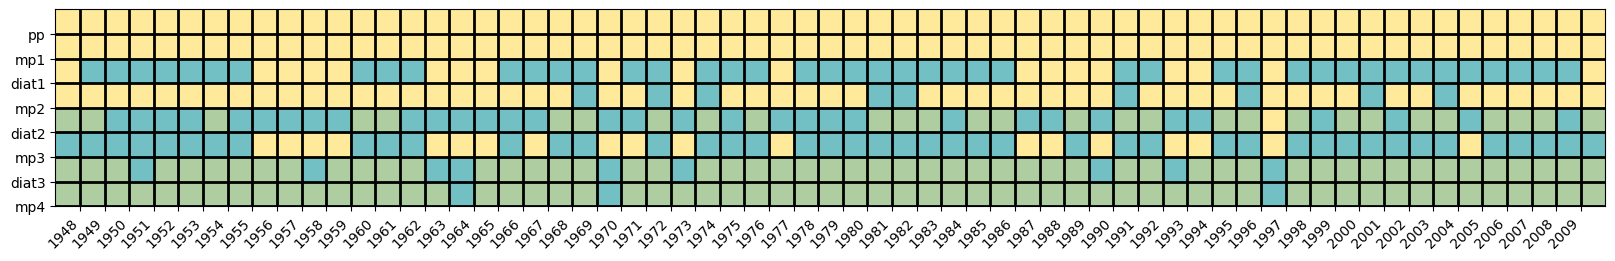

In [59]:
region = 'bb'
season = 'fall'
data =  np.nanmean(phyto_lims_fall[:,:,149:170,110:135],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

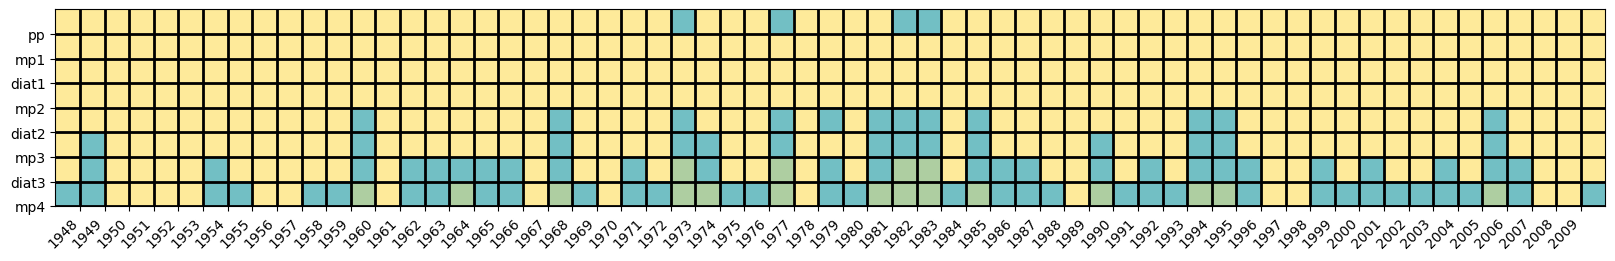

In [60]:
region = 'bb'
season = 'winter'
data =  np.nanmean(phyto_lims_winter[:,:,149:170,110:135],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

# Eastern Siberian Sea

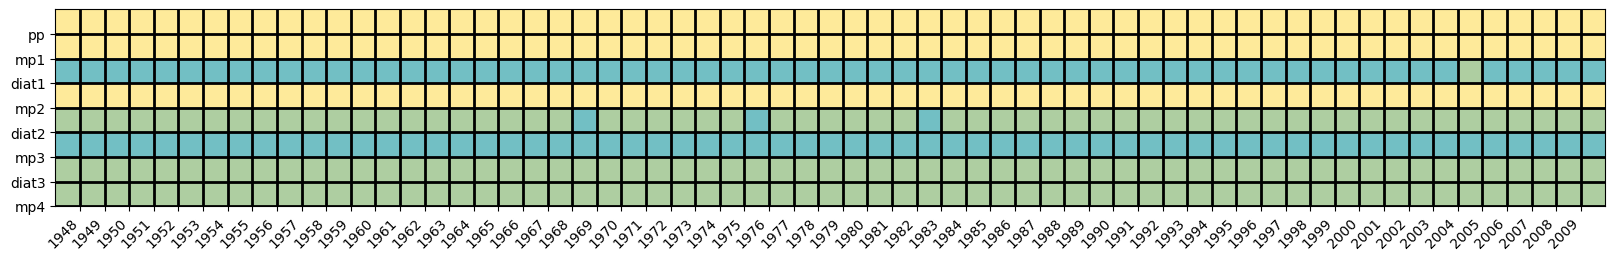

In [61]:
region = 'ess'
season = 'summer'
data =  np.nanmean(phyto_lims_summer[:,:,149:170,325:360],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

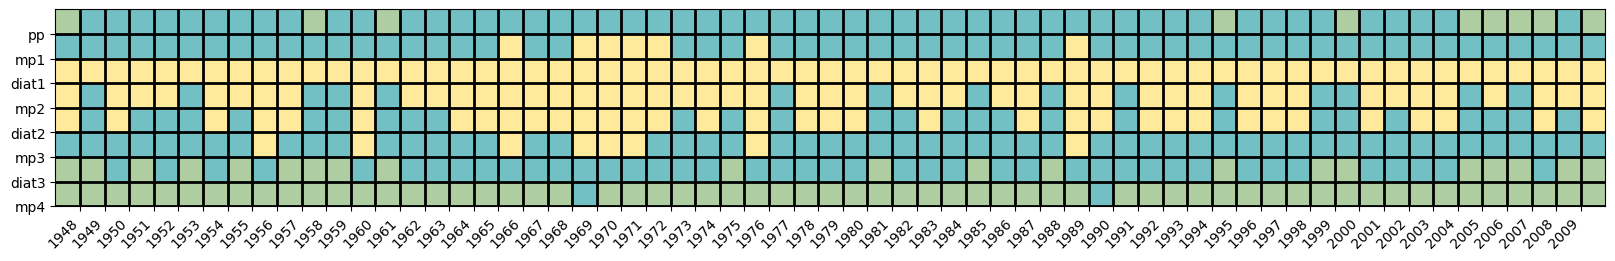

In [62]:
region = 'ess'
season = 'spring'
data =  np.nanmean(phyto_lims_spring[:,:,149:170,325:360],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

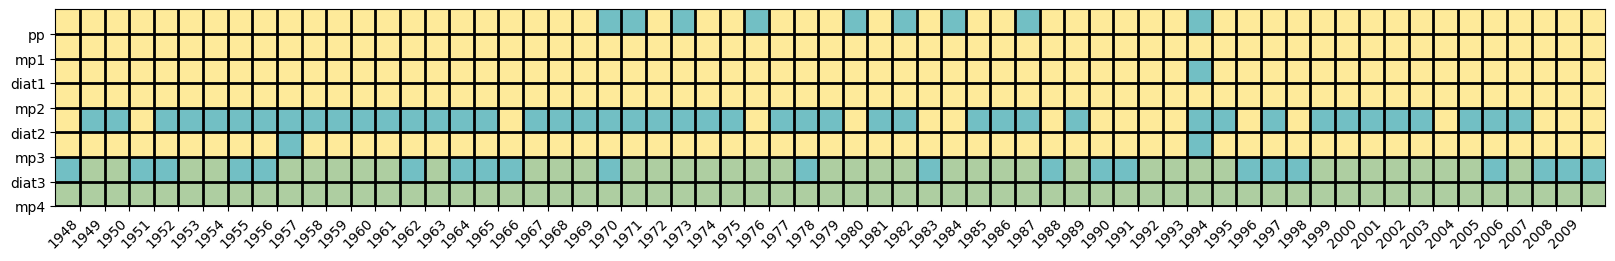

In [63]:
region = 'ess'
season = 'fall'
data =  np.nanmean(phyto_lims_fall[:,:,149:170,325:360],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

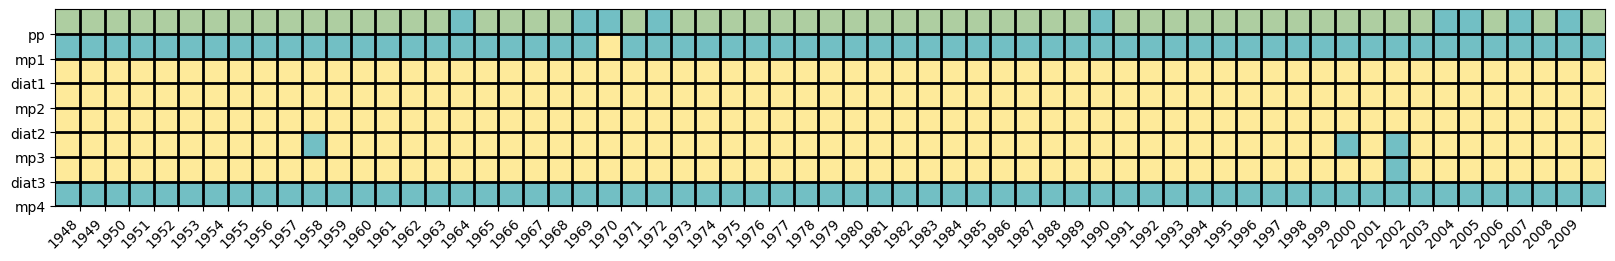

In [64]:
region = 'ess'
season = 'winter'
data =  np.nanmean(phyto_lims_winter[:,:,149:170,325:360],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

# Laptev Sea 

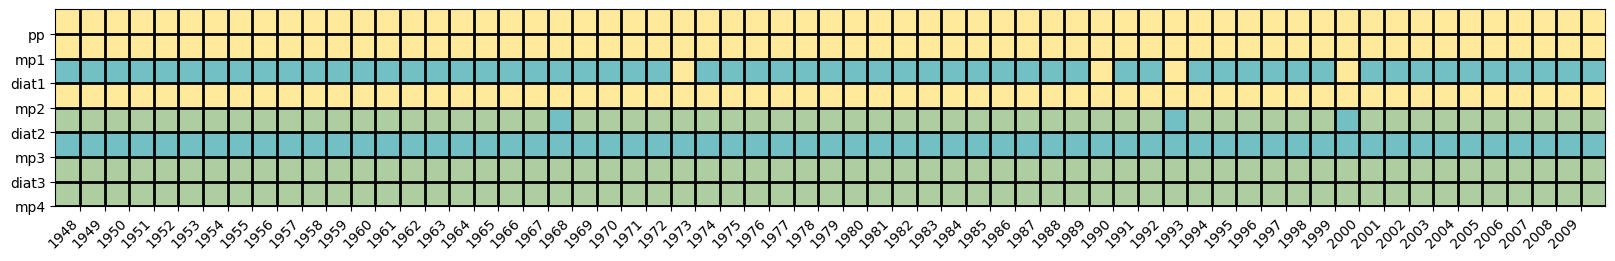

In [65]:
region = 'ls'
season = 'summer'
data =  np.nanmean(phyto_lims_summer[:,:,149:170,270:325],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

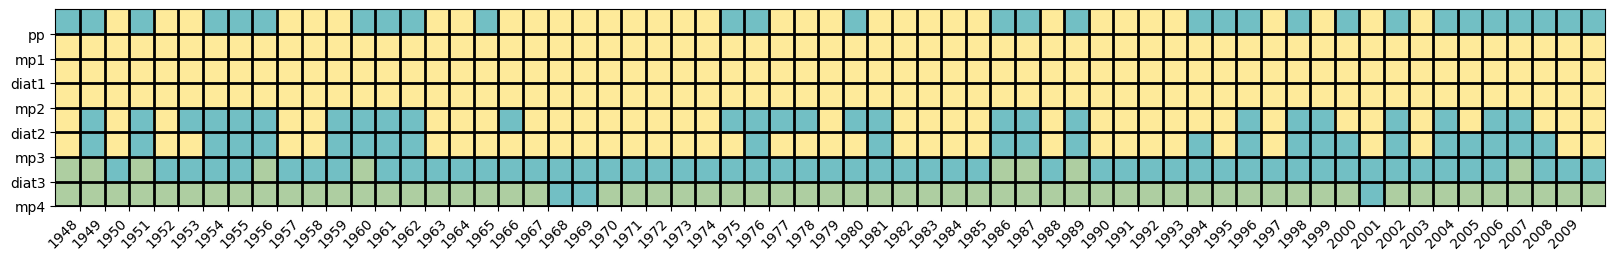

In [66]:
region = 'ls'
season = 'spring'
data =  np.nanmean(phyto_lims_spring[:,:,149:170,270:325],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

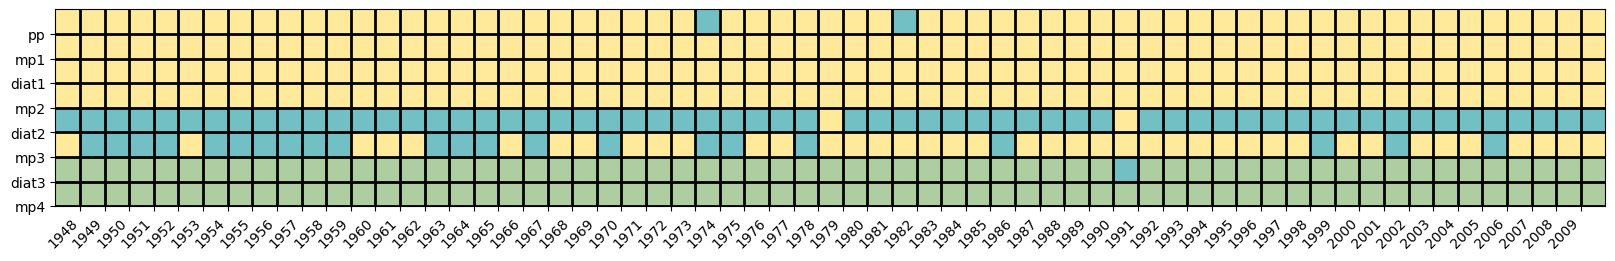

In [67]:
region = 'ls'
season = 'fall'
data =  np.nanmean(phyto_lims_fall[:,:,149:170,270:325],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

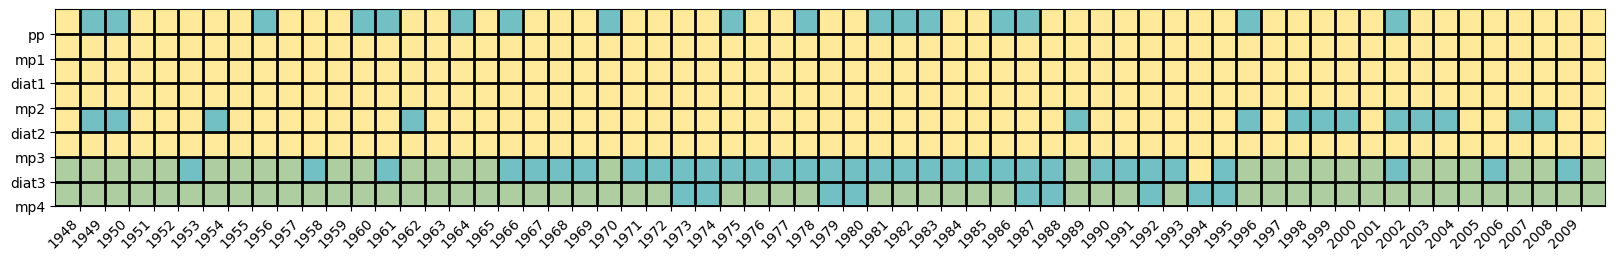

In [68]:
region = 'ls'
season = 'winter'
data =  np.nanmean(phyto_lims_winter[:,:,149:170,270:325],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

# Kara Sea

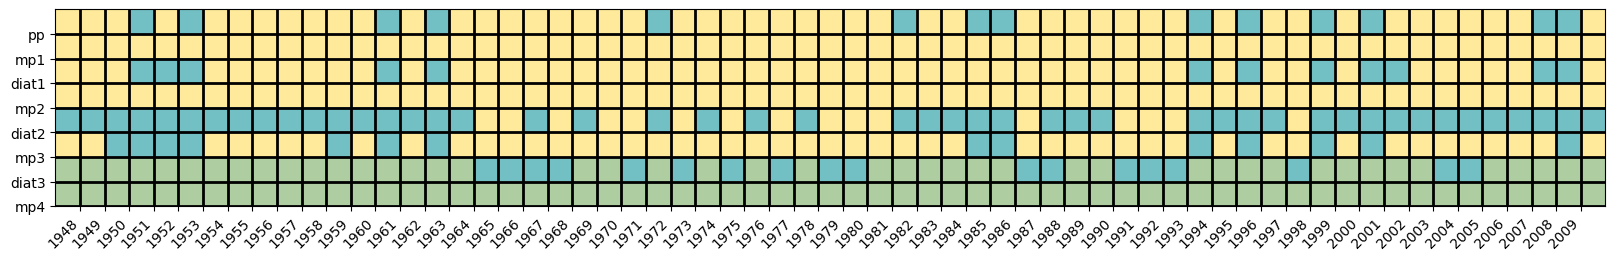

In [69]:
region = 'ks'
season = 'summer'
data =  np.nanmean(phyto_lims_summer[:,:,149:170,233:270],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

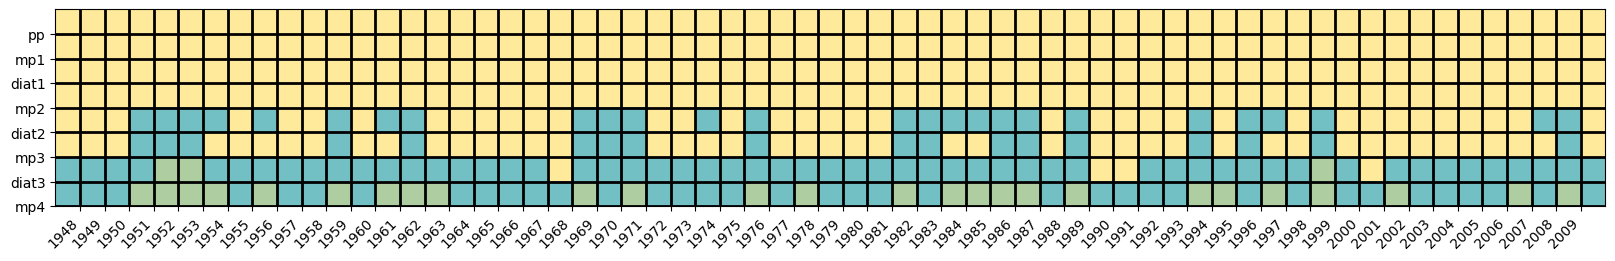

In [70]:
region = 'ks'
season = 'spring'
data =  np.nanmean(phyto_lims_spring[:,:,149:170,233:270],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

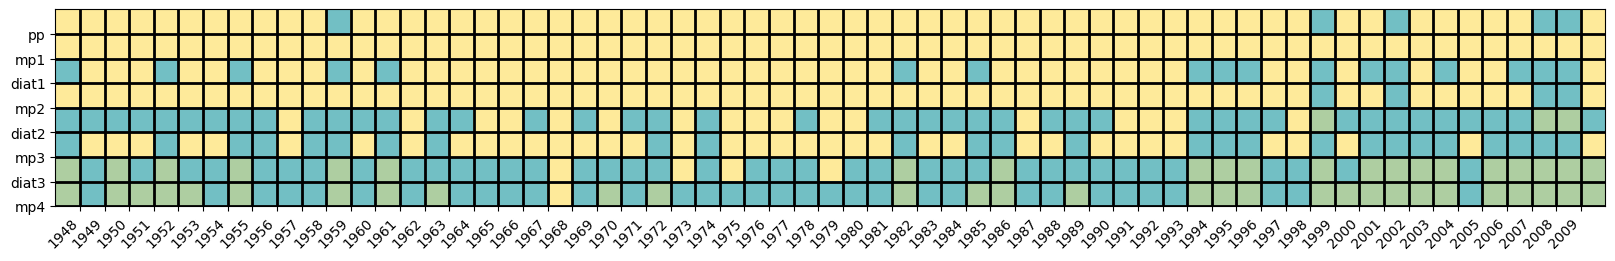

In [71]:
region = 'ks'
season = 'fall'
data =  np.nanmean(phyto_lims_fall[:,:,149:170,233:270],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

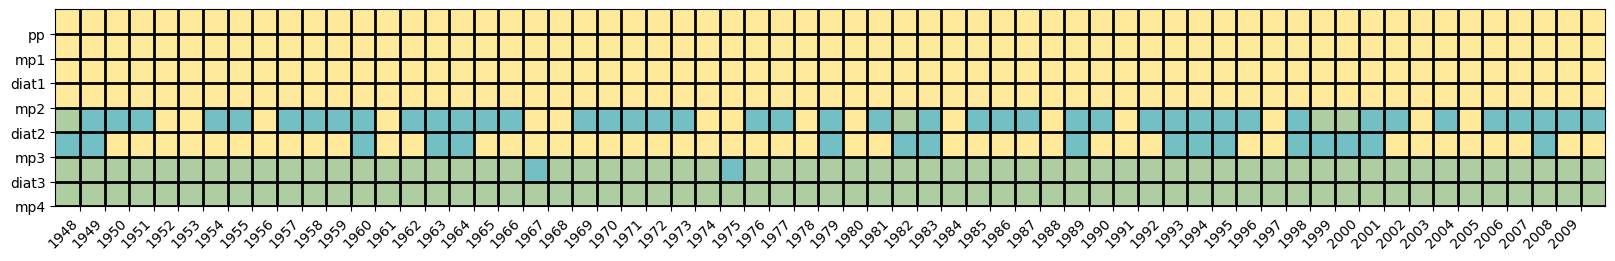

In [72]:
region = 'ks'
season = 'winter'
data =  np.nanmean(phyto_lims_winter[:,:,149:170,233:270],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

# Barents Sea

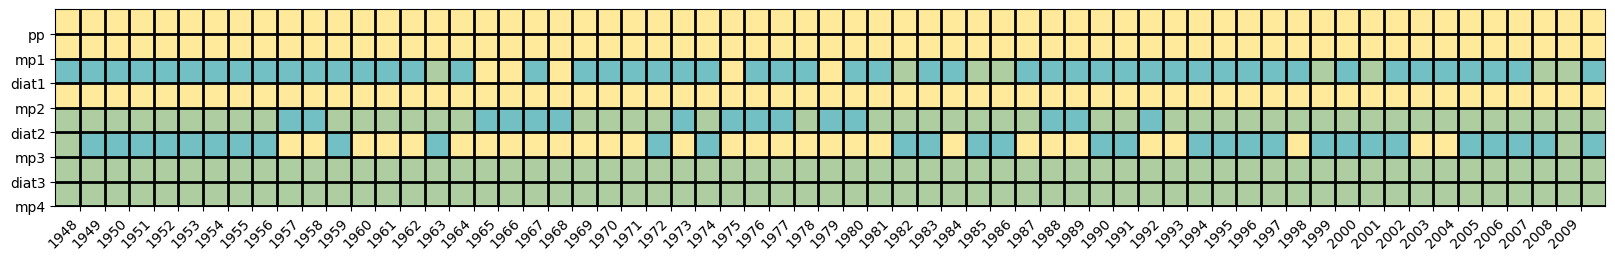

In [73]:
region = 'bts'
season = 'summer'
data =  np.nanmean(phyto_lims_summer[:,:,149:170,205:233],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

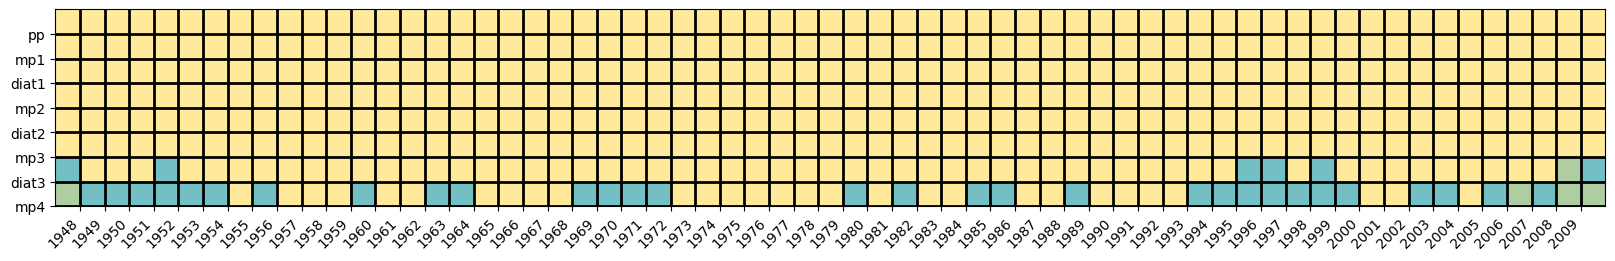

In [74]:
region = 'bts'
season = 'spring'
data =  np.nanmean(phyto_lims_spring[:,:,149:170,205:233],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

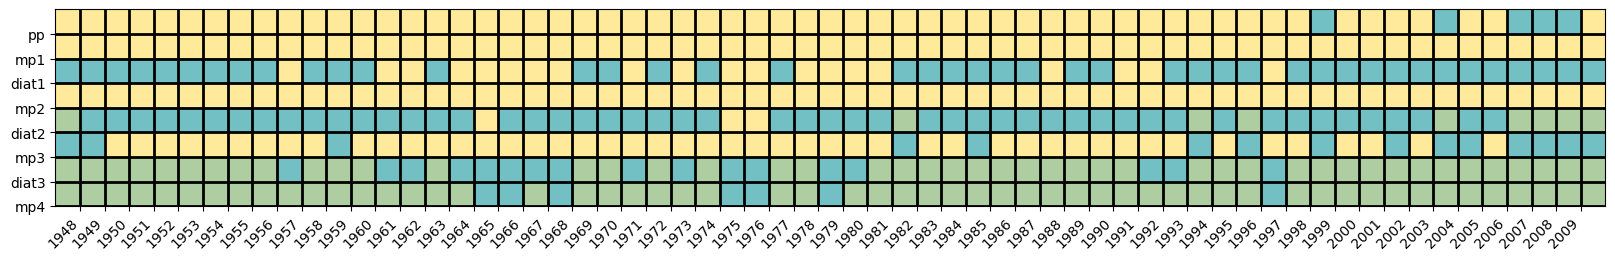

In [75]:
region = 'bts'
season = 'fall'
data =  np.nanmean(phyto_lims_fall[:,:,149:170,205:233],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

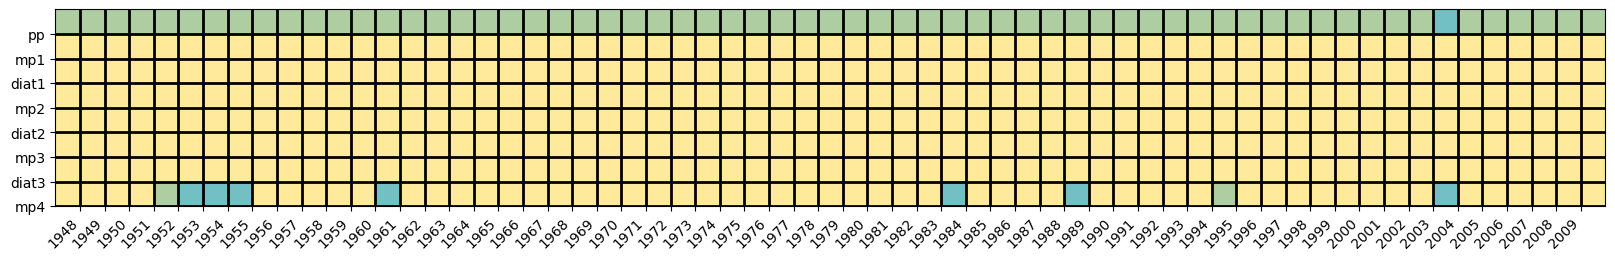

In [76]:
region = 'bts'
season = 'winter'
data =  np.nanmean(phyto_lims_winter[:,:,149:170,205:233],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

# Nordic Sea

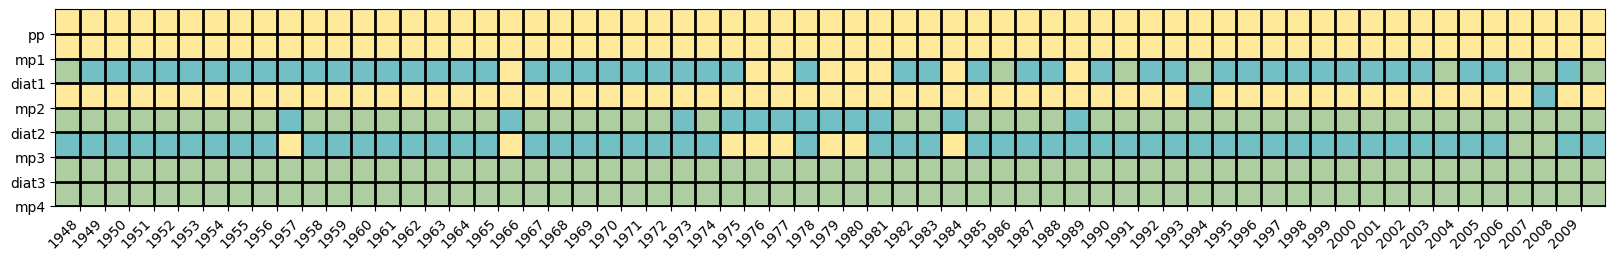

In [77]:
region = 'ns'
season = 'summer'
data =  np.nanmean(phyto_lims_summer[:,:,149:170,155:205],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

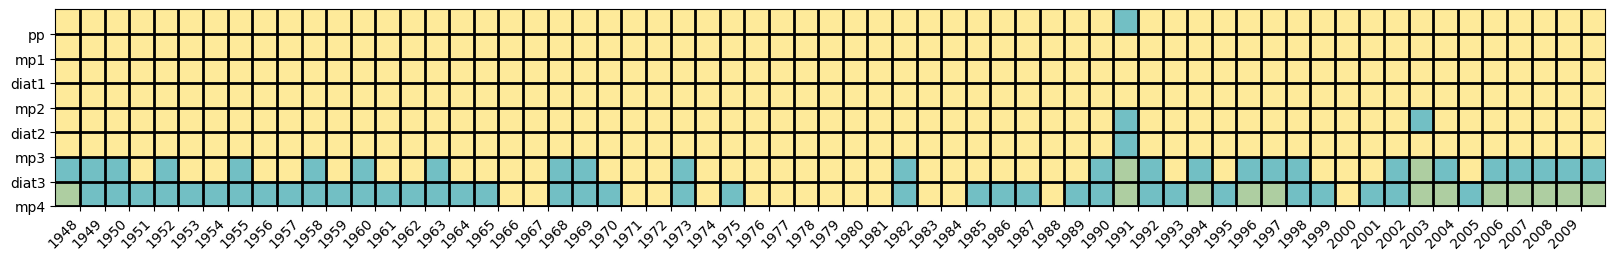

In [78]:
region = 'ns'
season = 'spring'
data =  np.nanmean(phyto_lims_spring[:,:,149:170,155:205],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

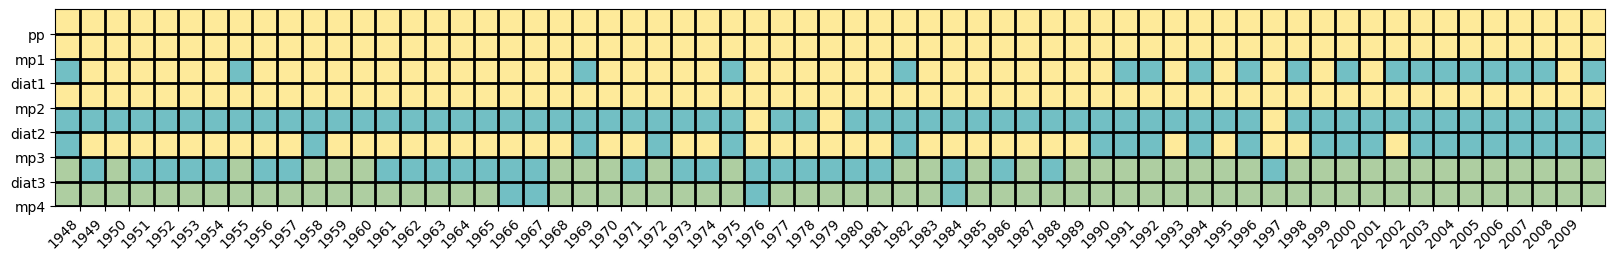

In [79]:
region = 'ns'
season = 'fall'
data =  np.nanmean(phyto_lims_fall[:,:,149:170,155:205],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

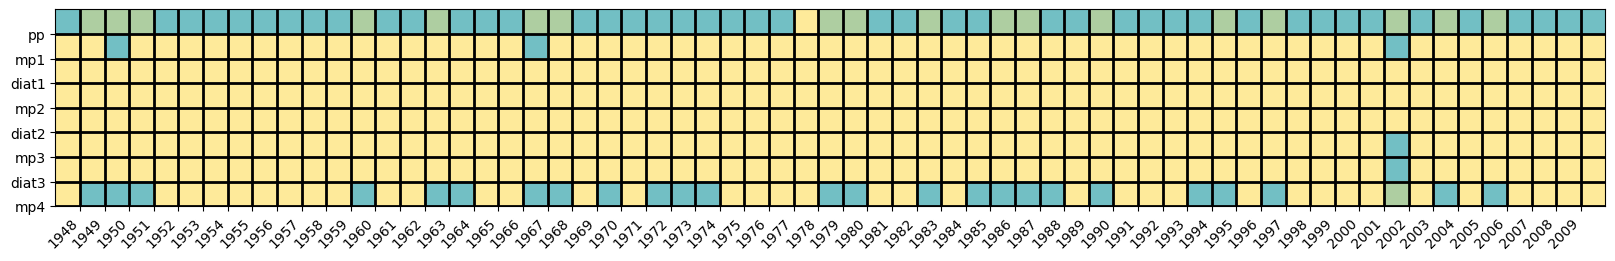

In [80]:
region = 'ns'
season = 'winter'
data =  np.nanmean(phyto_lims_winter[:,:,149:170,155:205],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}.png', dpi=600, bbox_inches='tight')

# Whole Arctic Ocean

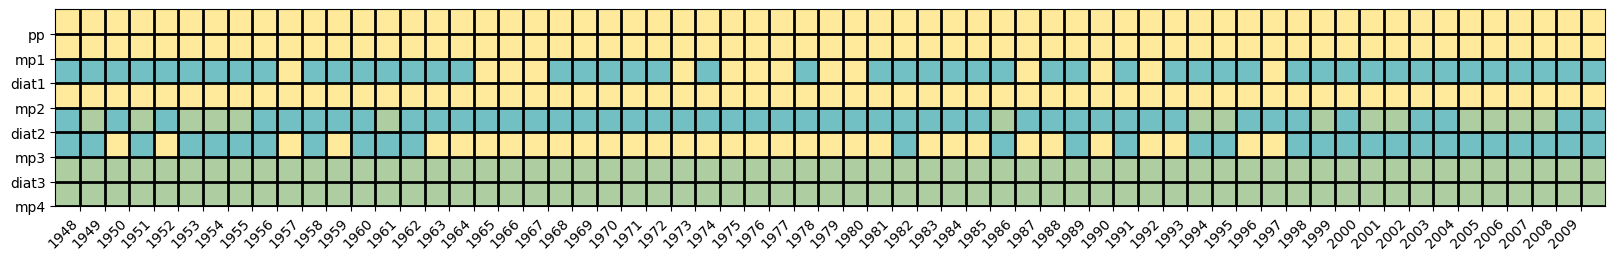

In [89]:
region = 'arctic_ocean'
season = 'summer'
data =  np.nanmean(phyto_lims_summer[:,:,149:180,:],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}whole_{region}_{season}.png', dpi=600, bbox_inches='tight')

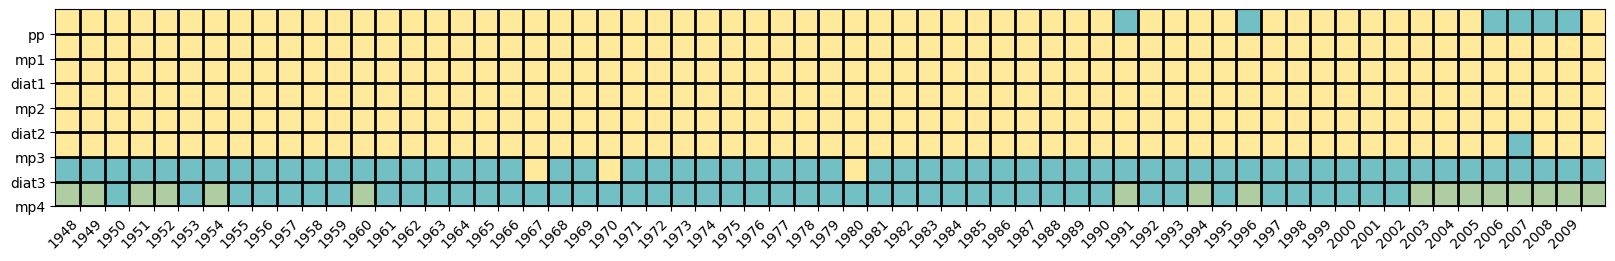

In [90]:
region = 'arctic_ocean'
season = 'spring'
data =  np.nanmean(phyto_lims_spring[:,:,149:180,:],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}whole_{region}_{season}.png', dpi=600, bbox_inches='tight')

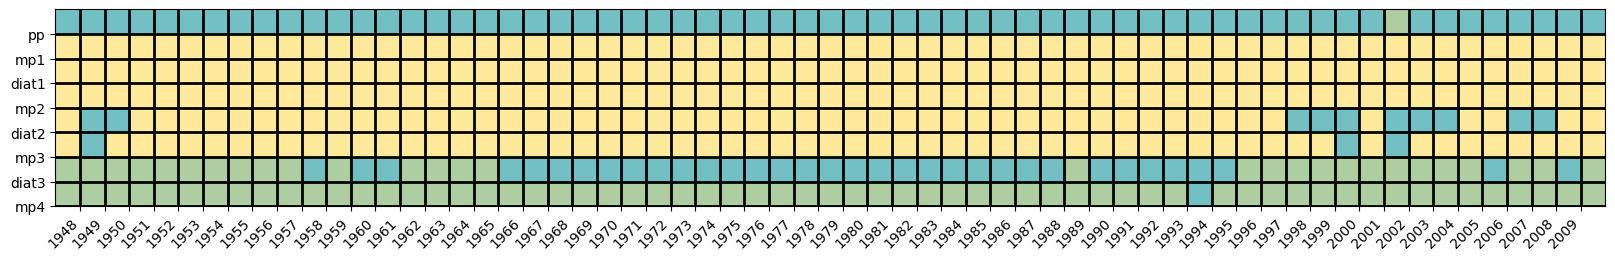

In [91]:
region = 'arctic_ocean'
season = 'winter'
data =  np.nanmean(phyto_lims_winter[:,:,149:180,:],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}whole_{region}_{season}.png', dpi=600, bbox_inches='tight')

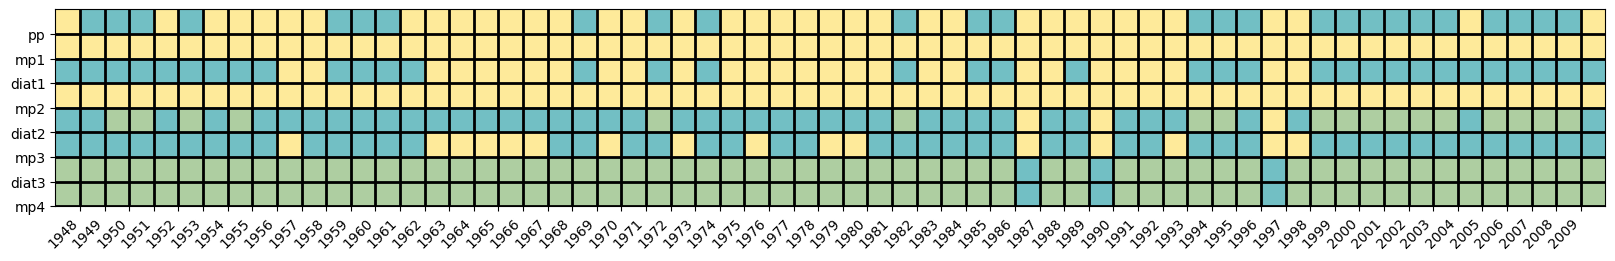

In [92]:
region = 'arctic_ocean'
season = 'fall'
data =  np.nanmean(phyto_lims_fall[:,:,149:180,:],axis=(2,3))# Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'])

plt.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}whole_{region}_{season}.png', dpi=600, bbox_inches='tight')

# Now plot out all of the anomalies

In [86]:
%%time
temp_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid/regrid_SPECTRA_TEMP*.nc', recursive=True))
ds= xr.open_mfdataset(temp_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

CPU times: user 565 ms, sys: 188 ms, total: 753 ms
Wall time: 14.2 s


In [87]:
%%time
temp_ds_inter = np.empty([63,12,180,360])
temp_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    temp_ds_inter[i,:,:,:] = ds.TEMP[x[i]:x[i]+12,0,:,:]

CPU times: user 10.7 s, sys: 14.7 s, total: 25.5 s
Wall time: 34.9 s


In [94]:
%%time
temp_ao = np.nanmean(temp_ds_inter[:,:,170:180,:], axis=(2,3))
temp_ao_anom = temp_ao[:,5:8]-np.nanmean(temp_ao[:,5:8],axis=0)

CPU times: user 12.9 ms, sys: 0 ns, total: 12.9 ms
Wall time: 13 ms


In [95]:
%%time
temp_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid/regrid_SPECTRA_ECOSYS_IFRAC*.nc', recursive=True))
ds= xr.open_mfdataset(temp_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

	NC4_close: ncid 0x160000
			nc4_close_hdf5_file: h5->path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/pp_lim_value_remap.nc abort 0
			nc4_rec_grp_HDF5_del: grp->name /
			closing HDF5 dataset 360287970189639761
			closing HDF5 dataset 360287970189639762
			closing HDF5 dataset 360287970189639763
			closing HDF5 dataset 360287970189639764
			closing HDF5 dataset 360287970189639765
			nc4_close_netcdf4_file: h5->path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/pp_lim_value_remap.nc abort 0
			nc4_rec_grp_del: grp->name /
			att_free: name CDI 
			att_free: name Conventions 
			att_free: name NCO 
			att_free: name history 
			att_free: name CDO 
			att_free: name standard_name 
			att_free: name units 
			att_free: name calendar 
			att_free: name axis 
			att_free: name standard_name 
			att_free: name long_name 
			att_free: name units 
			att_free: name axis 
			att_free: name standard_name 
			att_free: name long_name 
			att_free: name units 
			att_free: name axis 
			att_f

CPU times: user 399 ms, sys: 71 ms, total: 470 ms
Wall time: 2.38 s


	NC4_close: ncid 0x130000
			nc4_close_hdf5_file: h5->path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp3_lim_index_remap.nc abort 0
			nc4_rec_grp_HDF5_del: grp->name /
			closing HDF5 dataset 360287970189639734
			closing HDF5 dataset 360287970189639735
			closing HDF5 dataset 360287970189639736
			closing HDF5 dataset 360287970189639737
			closing HDF5 dataset 360287970189639738
			nc4_close_netcdf4_file: h5->path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp3_lim_index_remap.nc abort 0
			nc4_rec_grp_del: grp->name /
			att_free: name CDI 
			att_free: name Conventions 
			att_free: name NCO 
			att_free: name history 
			att_free: name CDO 
			att_free: name standard_name 
			att_free: name units 
			att_free: name calendar 
			att_free: name axis 
			att_free: name standard_name 
			att_free: name long_name 
			att_free: name units 
			att_free: name axis 
			att_free: name standard_name 
			att_free: name long_name 
			att_free: name units 
			att_free: name axis 
			att

In [96]:
%%time
ECOSYS_IFRAC_ds_inter = np.empty([63,12,180,360])
ECOSYS_IFRAC_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    ECOSYS_IFRAC_ds_inter[i,:,:,:] = ds.ECOSYS_IFRAC[x[i]:x[i]+12,:,:]

CPU times: user 572 ms, sys: 209 ms, total: 781 ms
Wall time: 1.94 s


In [97]:
%%time
ECOSYS_IFRAC_ao = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,170:180,:], axis=(2,3))
ECOSYS_IFRAC_ao_anom = ECOSYS_IFRAC_ao[:,5:8]-np.nanmean(ECOSYS_IFRAC_ao[:,5:8],axis=0)

CPU times: user 13.6 ms, sys: 0 ns, total: 13.6 ms
Wall time: 13.6 ms


In [98]:
%%time
NO3_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid/regrid_SPECTRA_NO3*.nc', recursive=True))
ds= xr.open_mfdataset(NO3_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

CPU times: user 509 ms, sys: 175 ms, total: 684 ms
Wall time: 14.7 s


In [99]:
%%time
NO3_ds_inter = np.empty([63,12,180,360])
NO3_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    NO3_ds_inter[i,:,:,:] = ds.NO3[x[i]:x[i]+12,0,:,:]

CPU times: user 10.8 s, sys: 14.7 s, total: 25.5 s
Wall time: 35.1 s


In [100]:
%%time
NO3_ao = np.nanmean(NO3_ds_inter[:,:,170:180,:], axis=(2,3))
NO3_ao_anom = NO3_ao[:,5:8]-np.nanmean(NO3_ao[:,5:8],axis=0)

CPU times: user 15.2 ms, sys: 2.19 ms, total: 17.4 ms
Wall time: 41.3 ms


In [101]:
NO3_ao_anom.shape

(63, 3)

In [102]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec

## Arctic Regions
|Region| Latitude | Longitude | Matrix Inputs       |
|------|----------|-----------|---------------------|
|`ao`  |170:180   |:          |`[:,170:180,:]`      |
|`cs`  |149:170   |0:25       |`[:,149:170,0:25]`   |
|`bs`  |149:170   | 25:55     |`[:,149:170,25:55]`  |
|`ca`  |149:170   |55:80     |`[:,149:170,55:110]` |
|`bb`  |149:170   |80:135    |`[:,149:170,110:135]`|
|`ess` |149:170   |325:360    |`[:149:170,325:360]` |
|`ls`  |149:170   |270:325    |`[:,149:170,270:325]`|
|`ks`  |149:170   |233:270    |`[:,149:170,233:270]`|
|`bts` |149:170   |200:233    |`[:,149:170,205:233]`|
|`ns`  |149:170   |155:200    |`[:,149:170,155:205]`|

# Central Arctic Ocean

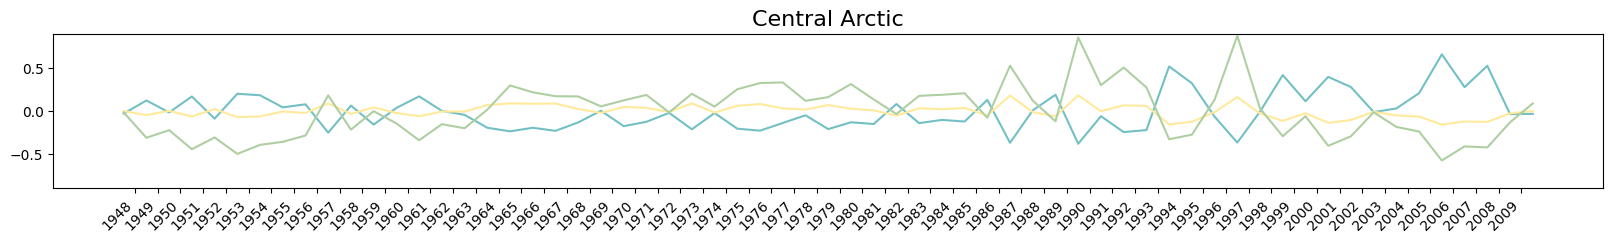

In [106]:
region = 'ao'
season = 'summer'

cmap= matplotlib.cm.get_cmap('Reds', 10)
cmap1= matplotlib.cm.get_cmap('Blues', 10)

fig = plt.figure(figsize=(20, 2))

# Subplot 1
ax1 = fig.add_subplot(1,1,1);
ax1.plot(np.nanmean(temp_ao_anom,axis=1),color=cm(1))
ax1.plot(np.nanmean(ECOSYS_IFRAC_ao_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_anom,axis=1), color=cm(2))
ax1.set_title('Central Arctic', fontsize=16)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-0.9,0.9)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

# Chukchi Sea 

In [107]:
%%time
temp_ao = np.nanmean(temp_ds_inter[:,:,149:170,0:25], axis=(2,3))
temp_ao_anom = temp_ao[:,5:8]-np.nanmean(temp_ao[:,5:8],axis=0)

ECOSYS_IFRAC_ao = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:170,0:25], axis=(2,3))
ECOSYS_IFRAC_ao_anom = ECOSYS_IFRAC_ao[:,5:8]-np.nanmean(ECOSYS_IFRAC_ao[:,5:8],axis=0)

NO3_ao = np.nanmean(NO3_ds_inter[:,:,149:170,0:25], axis=(2,3))
NO3_ao_anom = NO3_ao[:,5:8]-np.nanmean(NO3_ao[:,5:8],axis=0)

CPU times: user 19.4 ms, sys: 2.3 ms, total: 21.7 ms
Wall time: 42.9 ms


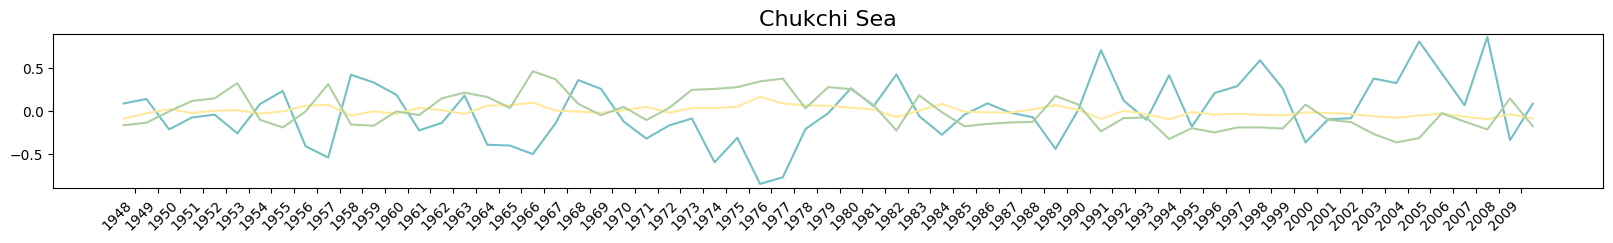

In [108]:
region = 'cs'
season = 'summer'

cmap= matplotlib.cm.get_cmap('Reds', 10)
cmap1= matplotlib.cm.get_cmap('Blues', 10)

fig = plt.figure(figsize=(20, 2))

# Subplot 1
ax1 = fig.add_subplot(1,1,1);
ax1.plot(np.nanmean(temp_ao_anom,axis=1),color=cm(1))
ax1.plot(np.nanmean(ECOSYS_IFRAC_ao_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_anom,axis=1), color=cm(2))
ax1.set_title('Chukchi Sea', fontsize=16)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-0.9,0.9)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

# Beaufort Sea

In [109]:
%%time
temp_ao = np.nanmean(temp_ds_inter[:,:,149:170,25:55], axis=(2,3))
temp_ao_anom = temp_ao[:,5:8]-np.nanmean(temp_ao[:,5:8],axis=0)

ECOSYS_IFRAC_ao = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:170,25:55], axis=(2,3))
ECOSYS_IFRAC_ao_anom = ECOSYS_IFRAC_ao[:,5:8]-np.nanmean(ECOSYS_IFRAC_ao[:,5:8],axis=0)

NO3_ao = np.nanmean(NO3_ds_inter[:,:,149:170,25:55], axis=(2,3))
NO3_ao_anom = NO3_ao[:,5:8]-np.nanmean(NO3_ao[:,5:8],axis=0)

CPU times: user 17.5 ms, sys: 3.31 ms, total: 20.8 ms
Wall time: 37.6 ms


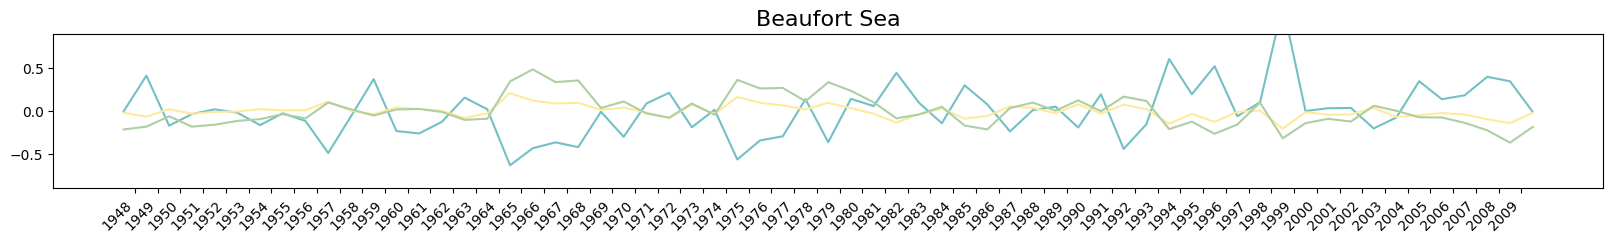

In [110]:
region = 'bs'
season = 'summer'

cmap= matplotlib.cm.get_cmap('Reds', 10)
cmap1= matplotlib.cm.get_cmap('Blues', 10)

fig = plt.figure(figsize=(20, 2))

# Subplot 1
ax1 = fig.add_subplot(1,1,1);
ax1.plot(np.nanmean(temp_ao_anom,axis=1),color=cm(1))
ax1.plot(np.nanmean(ECOSYS_IFRAC_ao_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_anom,axis=1), color=cm(2))
ax1.set_title('Beaufort Sea', fontsize=16)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-0.9,0.9)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

# Canadian Archipelago

In [111]:
%%time
temp_ao = np.nanmean(temp_ds_inter[:,:,149:170,55:110], axis=(2,3))
temp_ao_anom = temp_ao[:,5:8]-np.nanmean(temp_ao[:,5:8],axis=0)

ECOSYS_IFRAC_ao = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:170,55:110], axis=(2,3))
ECOSYS_IFRAC_ao_anom = ECOSYS_IFRAC_ao[:,5:8]-np.nanmean(ECOSYS_IFRAC_ao[:,5:8],axis=0)

NO3_ao = np.nanmean(NO3_ds_inter[:,:,149:170,55:110], axis=(2,3))
NO3_ao_anom = NO3_ao[:,5:8]-np.nanmean(NO3_ao[:,5:8],axis=0)

CPU times: user 19 ms, sys: 3.03 ms, total: 22 ms
Wall time: 40.1 ms


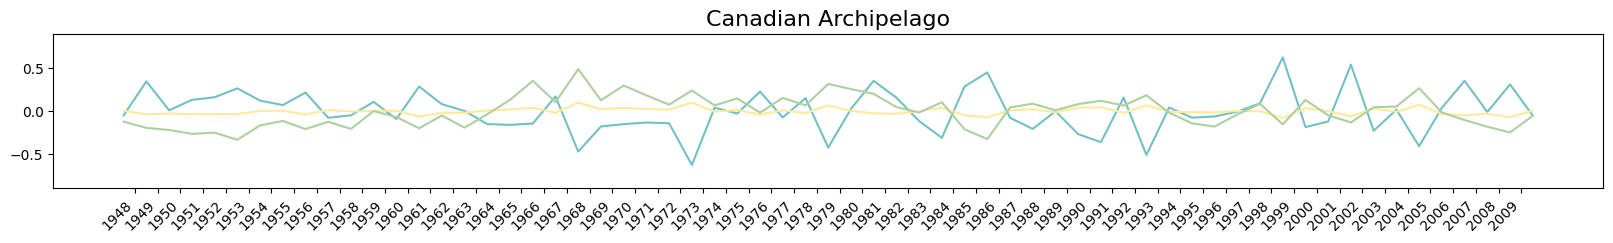

In [112]:
region = 'ca'
season = 'summer'

cmap= matplotlib.cm.get_cmap('Reds', 10)
cmap1= matplotlib.cm.get_cmap('Blues', 10)

fig = plt.figure(figsize=(20, 2))

# Subplot 1
ax1 = fig.add_subplot(1,1,1);
ax1.plot(np.nanmean(temp_ao_anom,axis=1),color=cm(1))
ax1.plot(np.nanmean(ECOSYS_IFRAC_ao_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_anom,axis=1), color=cm(2))
ax1.set_title('Canadian Archipelago', fontsize=16)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-0.9,0.9)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

# Baffin Sea

In [113]:
%%time
temp_ao = np.nanmean(temp_ds_inter[:,:,149:170,110:135], axis=(2,3))
temp_ao_anom = temp_ao[:,5:8]-np.nanmean(temp_ao[:,5:8],axis=0)

ECOSYS_IFRAC_ao = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:170,110:135], axis=(2,3))
ECOSYS_IFRAC_ao_anom = ECOSYS_IFRAC_ao[:,5:8]-np.nanmean(ECOSYS_IFRAC_ao[:,5:8],axis=0)

NO3_ao = np.nanmean(NO3_ds_inter[:,:,149:170,110:135], axis=(2,3))
NO3_ao_anom = NO3_ao[:,5:8]-np.nanmean(NO3_ao[:,5:8],axis=0)

CPU times: user 11.9 ms, sys: 4.82 ms, total: 16.7 ms
Wall time: 31 ms


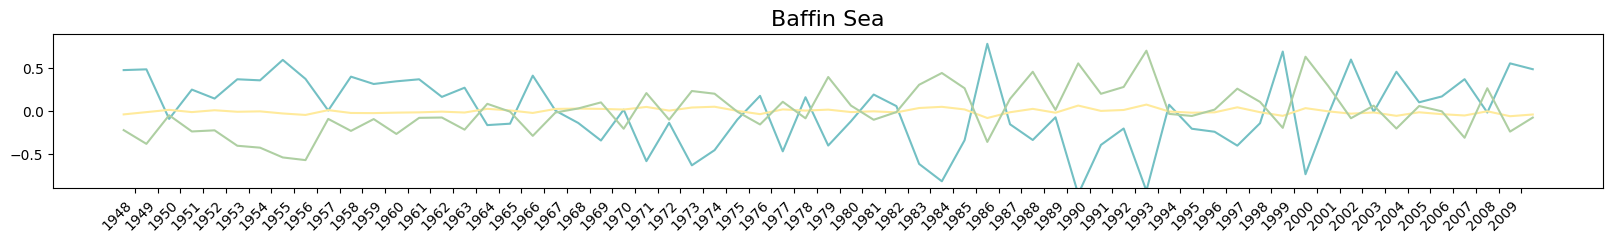

In [114]:
region = 'bb'
season = 'summer'

cmap= matplotlib.cm.get_cmap('Reds', 10)
cmap1= matplotlib.cm.get_cmap('Blues', 10)

fig = plt.figure(figsize=(20, 2))

# Subplot 1
ax1 = fig.add_subplot(1,1,1);
ax1.plot(np.nanmean(temp_ao_anom,axis=1),color=cm(1))
ax1.plot(np.nanmean(ECOSYS_IFRAC_ao_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_anom,axis=1), color=cm(2))
ax1.set_title('Baffin Sea', fontsize=16)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-0.9,0.9)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

# Eastern Siberian Sea

In [115]:
%%time
temp_ao = np.nanmean(temp_ds_inter[:,:,149:170,325:360], axis=(2,3))
temp_ao_anom = temp_ao[:,5:8]-np.nanmean(temp_ao[:,5:8],axis=0)

ECOSYS_IFRAC_ao = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:170,325:360], axis=(2,3))
ECOSYS_IFRAC_ao_anom = ECOSYS_IFRAC_ao[:,5:8]-np.nanmean(ECOSYS_IFRAC_ao[:,5:8],axis=0)

NO3_ao = np.nanmean(NO3_ds_inter[:,:,149:170,325:360], axis=(2,3))
NO3_ao_anom = NO3_ao[:,5:8]-np.nanmean(NO3_ao[:,5:8],axis=0)

CPU times: user 13 ms, sys: 1.01 ms, total: 14 ms
Wall time: 14 ms


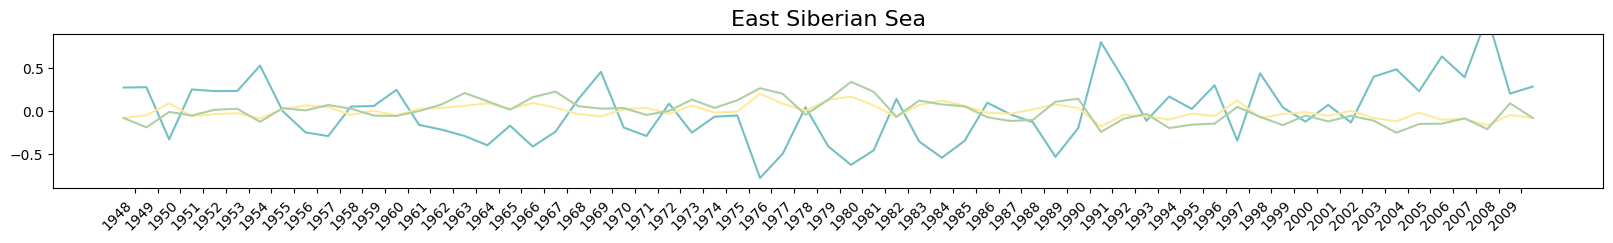

In [116]:
region = 'ess'
season = 'summer'

cmap= matplotlib.cm.get_cmap('Reds', 10)
cmap1= matplotlib.cm.get_cmap('Blues', 10)

fig = plt.figure(figsize=(20, 2))

# Subplot 1
ax1 = fig.add_subplot(1,1,1);
ax1.plot(np.nanmean(temp_ao_anom,axis=1),color=cm(1))
ax1.plot(np.nanmean(ECOSYS_IFRAC_ao_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_anom,axis=1), color=cm(2))
ax1.set_title('East Siberian Sea', fontsize=16)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-0.9,0.9)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

# Laptev Sea 

In [117]:
%%time
temp_ao = np.nanmean(temp_ds_inter[:,:,149:170,270:325], axis=(2,3))
temp_ao_anom = temp_ao[:,5:8]-np.nanmean(temp_ao[:,5:8],axis=0)

ECOSYS_IFRAC_ao = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:170,270:325], axis=(2,3))
ECOSYS_IFRAC_ao_anom = ECOSYS_IFRAC_ao[:,5:8]-np.nanmean(ECOSYS_IFRAC_ao[:,5:8],axis=0)

NO3_ao = np.nanmean(NO3_ds_inter[:,:,149:170,270:325], axis=(2,3))
NO3_ao_anom = NO3_ao[:,5:8]-np.nanmean(NO3_ao[:,5:8],axis=0)

CPU times: user 21.7 ms, sys: 3.85 ms, total: 25.5 ms
Wall time: 30.7 ms


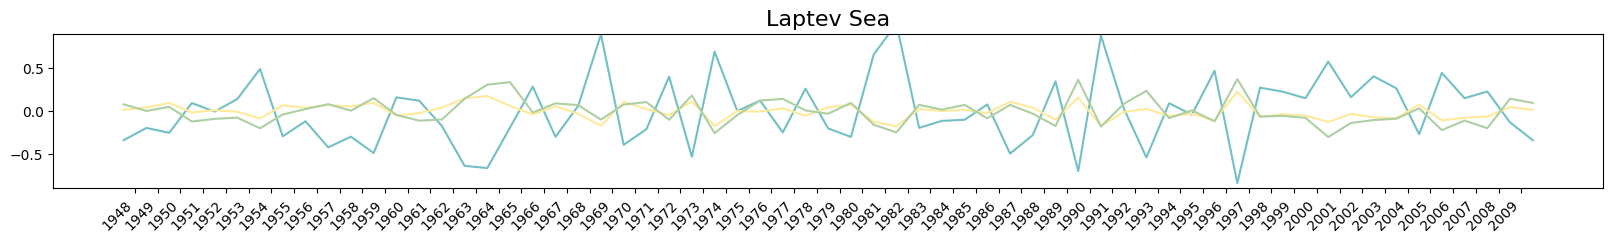

In [118]:
region = 'ls'
season = 'summer'

cmap= matplotlib.cm.get_cmap('Reds', 10)
cmap1= matplotlib.cm.get_cmap('Blues', 10)

fig = plt.figure(figsize=(20, 2))

# Subplot 1
ax1 = fig.add_subplot(1,1,1);
ax1.plot(np.nanmean(temp_ao_anom,axis=1),color=cm(1))
ax1.plot(np.nanmean(ECOSYS_IFRAC_ao_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_anom,axis=1), color=cm(2))
ax1.set_title('Laptev Sea', fontsize=16)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-0.9,0.9)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

# Kara Sea

In [119]:
%%time
temp_ao = np.nanmean(temp_ds_inter[:,:,149:170,233:270], axis=(2,3))
temp_ao_anom = temp_ao[:,5:8]-np.nanmean(temp_ao[:,5:8],axis=0)

ECOSYS_IFRAC_ao = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:170,233:270], axis=(2,3))
ECOSYS_IFRAC_ao_anom = ECOSYS_IFRAC_ao[:,5:8]-np.nanmean(ECOSYS_IFRAC_ao[:,5:8],axis=0)

NO3_ao = np.nanmean(NO3_ds_inter[:,:,149:170,233:270], axis=(2,3))
NO3_ao_anom = NO3_ao[:,5:8]-np.nanmean(NO3_ao[:,5:8],axis=0)

CPU times: user 17.3 ms, sys: 3.81 ms, total: 21.1 ms
Wall time: 30 ms


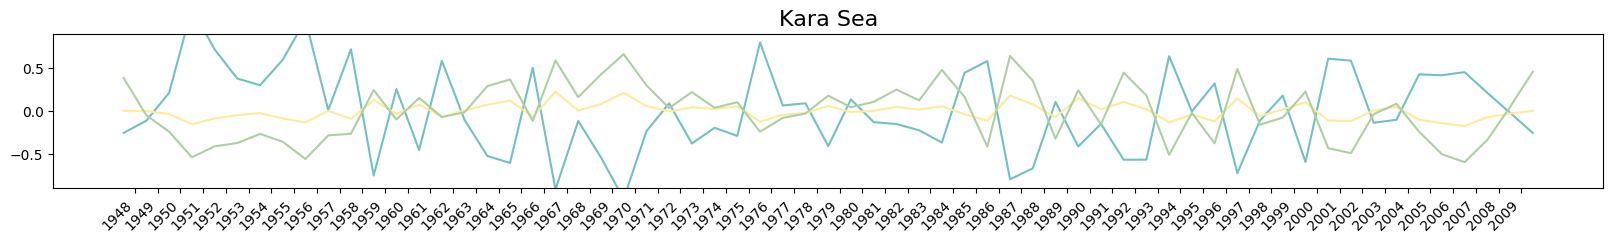

In [120]:
region = 'ks'
season = 'summer'

cmap= matplotlib.cm.get_cmap('Reds', 10)
cmap1= matplotlib.cm.get_cmap('Blues', 10)

fig = plt.figure(figsize=(20, 2))

# Subplot 1
ax1 = fig.add_subplot(1,1,1);
ax1.plot(np.nanmean(temp_ao_anom,axis=1),color=cm(1))
ax1.plot(np.nanmean(ECOSYS_IFRAC_ao_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_anom,axis=1), color=cm(2))
ax1.set_title('Kara Sea', fontsize=16)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-0.9,0.9)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

# Barents Sea

In [121]:
%%time
temp_ao = np.nanmean(temp_ds_inter[:,:,149:170,205:233], axis=(2,3))
temp_ao_anom = temp_ao[:,5:8]-np.nanmean(temp_ao[:,5:8],axis=0)

ECOSYS_IFRAC_ao = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:170,205:233], axis=(2,3))
ECOSYS_IFRAC_ao_anom = ECOSYS_IFRAC_ao[:,5:8]-np.nanmean(ECOSYS_IFRAC_ao[:,5:8],axis=0)

NO3_ao = np.nanmean(NO3_ds_inter[:,:,149:170,205:233], axis=(2,3))
NO3_ao_anom = NO3_ao[:,5:8]-np.nanmean(NO3_ao[:,5:8],axis=0)

CPU times: user 13.1 ms, sys: 0 ns, total: 13.1 ms
Wall time: 15.3 ms


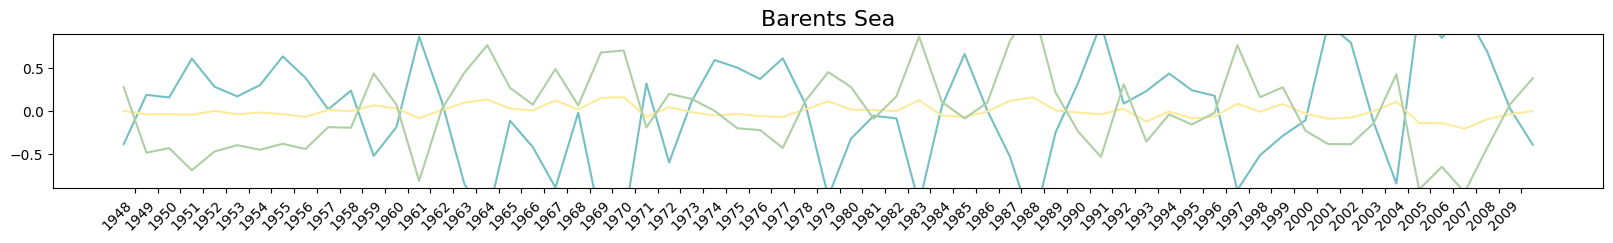

In [122]:
region = 'bts'
season = 'summer'

cmap= matplotlib.cm.get_cmap('Reds', 10)
cmap1= matplotlib.cm.get_cmap('Blues', 10)

fig = plt.figure(figsize=(20, 2))

# Subplot 1
ax1 = fig.add_subplot(1,1,1);
ax1.plot(np.nanmean(temp_ao_anom,axis=1),color=cm(1))
ax1.plot(np.nanmean(ECOSYS_IFRAC_ao_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_anom,axis=1), color=cm(2))
ax1.set_title('Barents Sea', fontsize=16)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-0.9,0.9)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

# Nordic Sea

In [123]:
%%time
temp_ao = np.nanmean(temp_ds_inter[:,:,149:170,155:205], axis=(2,3))
temp_ao_anom = temp_ao[:,5:8]-np.nanmean(temp_ao[:,5:8],axis=0)

ECOSYS_IFRAC_ao = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:170,155:205], axis=(2,3))
ECOSYS_IFRAC_ao_anom = ECOSYS_IFRAC_ao[:,5:8]-np.nanmean(ECOSYS_IFRAC_ao[:,5:8],axis=0)

NO3_ao = np.nanmean(NO3_ds_inter[:,:,149:170,155:205], axis=(2,3))
NO3_ao_anom = NO3_ao[:,5:8]-np.nanmean(NO3_ao[:,5:8],axis=0)

CPU times: user 19.3 ms, sys: 3.13 ms, total: 22.4 ms
Wall time: 46.1 ms


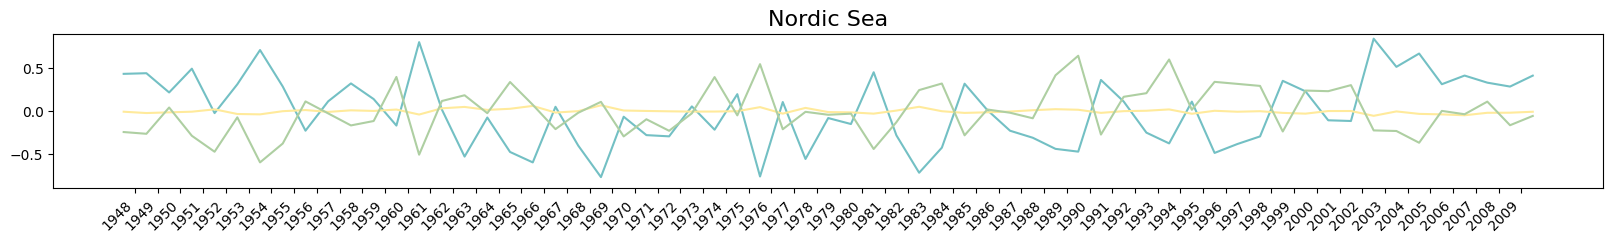

In [124]:
region = 'ns'
season = 'summer'

cmap= matplotlib.cm.get_cmap('Reds', 10)
cmap1= matplotlib.cm.get_cmap('Blues', 10)

fig = plt.figure(figsize=(20, 2))

# Subplot 1
ax1 = fig.add_subplot(1,1,1);
ax1.plot(np.nanmean(temp_ao_anom,axis=1),color=cm(1))
ax1.plot(np.nanmean(ECOSYS_IFRAC_ao_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_anom,axis=1), color=cm(2))
ax1.set_title('Nordic Sea', fontsize=16)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-0.9,0.9)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')